# EDA


In [1]:
import numpy as np
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
import warnings
import sweetviz
import itertools    # memory performance, efficient looping
%matplotlib inline
warnings.filterwarnings("ignore")

# Read and display  the given file

In [2]:
# Reading data

loan_data = pd.read_csv('loan_data.csv')


In [3]:
# Shape of data

print('Shape of loan_data:', loan_data.shape)


Shape of loan_data: (307511, 122)


In [4]:
# Data display: all the columns in loan_data

pd.set_option("display.max_columns", None)
loan_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [5]:
pd.set_option("display.max_rows", None)
loan_data.describe().T.to_excel("trans.xlsx")

# Work with loan_data: application_data.csv

### <font color = Green> Step 1. Missing value treatment (application_data.csv)

In [6]:
# Print the counts of missing values in all the columns

pd.set_option("display.max_rows", None)
loan_data.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [7]:
# Print all missing values in percentage terams

pd.set_option("display.max_rows", None)
round(loan_data.isnull().sum()/len(loan_data)*100, 4).to_excel("Null.xlsx")

## How do we treat missing values?
We are using both dropping columns and imputation. 
### <font color = Green> Columns with more than 40% missing values
There are 49 columns with more than 40% missing values. Majority of these columns contain information on clients' apartment age, size, living area, non-living area, wall color/material etc. These variables stand at lower echelon of priority for analysis, and presence of huge missing values makes them even less crucial for our analysis.
> <font color = Blue> Decision: We drop all these 49 columns.<br>
> <font color = Blue> Important to note that choosing a removing threshold of less than 40% will remove a variable, which may turn out to be crucial for our analysis: 'OCCUPATION_TYPE', which has missing value of 31%.

In [8]:
# List of columns with more than 40% null values

cols_null = loan_data.isnull().sum()
cols_null = cols_null[cols_null.values > 0.40 * len(loan_data)]
len(cols_null)

49

In [9]:
# Remove these 49 columns and print the shape of the updated dataset

cols_null = list(cols_null.index)
loan_data.drop(labels = cols_null, axis = 1, inplace = True)
loan_data.shape

(307511, 73)

In [10]:
# Check percentages of null values in the updated dataset

round(loan_data.isnull().sum()/len(loan_data)*100, 4)

SK_ID_CURR                      0.0000
TARGET                          0.0000
NAME_CONTRACT_TYPE              0.0000
CODE_GENDER                     0.0000
FLAG_OWN_CAR                    0.0000
FLAG_OWN_REALTY                 0.0000
CNT_CHILDREN                    0.0000
AMT_INCOME_TOTAL                0.0000
AMT_CREDIT                      0.0000
AMT_ANNUITY                     0.0039
AMT_GOODS_PRICE                 0.0904
NAME_TYPE_SUITE                 0.4201
NAME_INCOME_TYPE                0.0000
NAME_EDUCATION_TYPE             0.0000
NAME_FAMILY_STATUS              0.0000
NAME_HOUSING_TYPE               0.0000
REGION_POPULATION_RELATIVE      0.0000
DAYS_BIRTH                      0.0000
DAYS_EMPLOYED                   0.0000
DAYS_REGISTRATION               0.0000
DAYS_ID_PUBLISH                 0.0000
FLAG_MOBIL                      0.0000
FLAG_EMP_PHONE                  0.0000
FLAG_WORK_PHONE                 0.0000
FLAG_CONT_MOBILE                0.0000
FLAG_PHONE               

#### <font color = Green> Imputation of missing value 1 <br>Column name: 'AMT_ANNUITY', Number of missing values: 12, Percentage of missing values: 0.0039

> <font color = Blue> We are dropping the 12 counts of missing values. We decide to do so, because missing values represent a very small percentage of total data.

In [11]:
# Drop the missing values

loan_data.dropna(subset = ['AMT_ANNUITY'], inplace = True)

In [12]:
loan_data.AMT_ANNUITY.isnull().sum()

0

#### <font color = Green> Imputation of missing value 2 <br> Column name: 'AMT_GOODS_PRICE', Number of missing values: 278, Percentage of missing values: 0.0904

> <font color = Blue> We are dropping the missing values, because they represent a very small percentage of total data.

In [13]:
# Drop the missing values

loan_data.dropna(subset = ['AMT_GOODS_PRICE'], inplace = True)

#### <font color = Green> Imputation of missing value 3 <br> Column name: 'NAME_TYPE_SUITE', Number of missing values:1292, Percentage of missing values: 0.4201

In [14]:
# Check the counts of this categorical variable

loan_data['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248515
Family              40148
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

> <font color = Blue> The mode is of the series is 'Unaccompanied'. The missing values constitute only 0.42% of total data in the series. If we impute the missing values with the mode, we don't run the chance of exaggerating the 'Unaccompanied' item in the series.
>> Decision is to impute the missing values with mode.

In [15]:
# Replace missing values with mode: the most frequent occurring value

loan_data.NAME_TYPE_SUITE.fillna('Unaccompanied', inplace = True)
loan_data.NAME_TYPE_SUITE.isnull().sum()

0

#### <font color = Green> Imputation of missing value 4 <br> Column name: 'OCCUPATION_TYPE', Number of missing values: 96391, Percentage of missing values: 31.3455

In [16]:
# Check the counts of this categorical variable

loan_data['OCCUPATION_TYPE'].value_counts()

Laborers                 55132
Sales staff              32063
Core staff               27530
Managers                 21347
Drivers                  18589
High skill tech staff    11370
Accountants               9801
Medicine staff            8527
Security staff            6712
Cooking staff             5939
Cleaning staff            4648
Private service staff     2648
Low-skill Laborers        2092
Waiters/barmen staff      1346
Secretaries               1304
Realty agents              751
HR staff                   563
IT staff                   525
Name: OCCUPATION_TYPE, dtype: int64

> <font color = Blue> Most frequently used method to treat these kind of missing values is to replace missing values with mode with the assumption that data is Missing At Random (MAR).<br>
>> In our case, however, we are not sure if the missing values are of MAR type. At the same time, if we impute the missing value with mode 'Laborers', we clearly will run the risk of mis-representing the mode variable. Therefore, we are not imputing the missing values. Instead, we are labelling them as 'Unknown_occupation' for easy identification. Such labelling will help us see if there is correlation between difficulty in loan repayment and 'Unknown_occupation'.

In [17]:
# Impute missing values with 'Unknown_Occupation'

loan_data.OCCUPATION_TYPE.fillna('Unknown_occupation', inplace = True)
loan_data.OCCUPATION_TYPE.isnull().sum()

0

#### <font color = Green> Imputation of missing value 5 <br> Column name: 'CNT_FAM_MEMBERS', Number of missing values: 2, Percentage of missing values: 0.0007

> <font color = Blue> We are dropping these two counts of values with the assumption that removing such small counts of rows will not impact our analysis.

In [18]:
# Drop the missing values

loan_data.dropna(subset = ['CNT_FAM_MEMBERS'], inplace = True)

In [19]:
# Check the missing values

loan_data.CNT_FAM_MEMBERS.isnull().sum()

0

#### <font color = Green> Imputation of missing value 6 <br> Column name: 'EXT_SOURCE_2 ', Number of missing values: 660, Percentage of missing values: 0.2146. <br> 
#### <font color = Green> Imputation of missing value 7 <br> Column name: 'EXT_SOURCE_3', Number of missing values: 60965, Percentage of missing values: 19.8253

> <font color = Blue> We are not imputing missing values here, we are dropping them instead. Reasons for dropping: <br>
>> <font color = Blue>  We are planning to analyze the correlation between average score of an applicant and payment difficulty, and other variables, if any. Presence of missing value will be problematic for that purpose. We'll drop all null values in EXT_SOURCE_2, and EXT_SOURCE_3.

In [20]:
# Drop the missing values: EXT_SOURCE_2 

loan_data.dropna(subset = ['EXT_SOURCE_2'], inplace = True)

In [21]:
# Check missing values

loan_data.EXT_SOURCE_2.isnull().sum()

0

In [22]:
# Drop the missing values: EXT_SOURCE_3 

loan_data.dropna(subset = ['EXT_SOURCE_3'], inplace = True)

In [23]:
# Check missing values

loan_data.EXT_SOURCE_3.isnull().sum()

0

#### <font color = Green> Imputation of missing value 8 <br> Column name: 'OBS_30_CNT_SOCIAL_CIRCLE', Number of missing values: 1021, Percentage of missing values: 0.3320

In [24]:
# Check descriptive statistics of the data series

loan_data['OBS_30_CNT_SOCIAL_CIRCLE'].describe()

count    245148.000000
mean          1.435708
std           2.423110
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

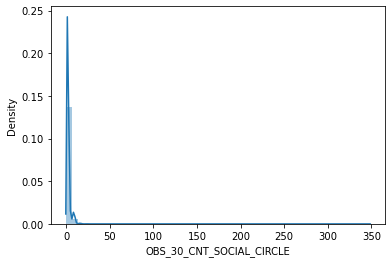

In [25]:
# Check the distribution type for farther insights

sns.distplot(loan_data['OBS_30_CNT_SOCIAL_CIRCLE']) 
plt.show()

> <font color = Blue> We are imputing the missing values with median The reason for choosing median is that the distribution of the series is rightly skewed. For such distribution, median is better choice than mean for imputation. Mean often is a biased measure for skewed data because it gets highly impacted by outliers present in the data.

In [26]:
# Impute the data with median

loan_data.OBS_30_CNT_SOCIAL_CIRCLE.fillna(loan_data.OBS_30_CNT_SOCIAL_CIRCLE.median(), inplace = True)
loan_data.OBS_30_CNT_SOCIAL_CIRCLE.isnull().sum()

0

#### <font color = Green> Imputation of missing value 9 <br> Column name: 'DEF_30_CNT_SOCIAL_CIRCLE', Number of missing values: 1021, Percentage of missing values: 0.3320

In [27]:
# Print the descriptive statistics of the series

print(loan_data.DEF_30_CNT_SOCIAL_CIRCLE.mode())
loan_data['DEF_30_CNT_SOCIAL_CIRCLE'].describe()

0    0.0
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64


count    245148.000000
mean          0.144354
std           0.448044
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          34.000000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64

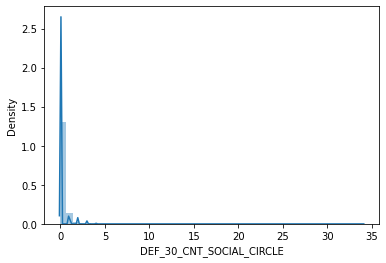

In [28]:
# Check the distribution type for farther insights

sns.distplot(loan_data['DEF_30_CNT_SOCIAL_CIRCLE']) 
plt.show()

> <font color = Blue> Right skewed data: We should choose median to impute the missing values.

In [29]:
# Impute missing values with median

loan_data.DEF_30_CNT_SOCIAL_CIRCLE.fillna(loan_data.DEF_30_CNT_SOCIAL_CIRCLE.median(), inplace = True)
loan_data.DEF_30_CNT_SOCIAL_CIRCLE.isnull().sum()

0

#### <font color = Green> Imputation of missing value 10 <br> Column name: 'OBS_60_CNT_SOCIAL_CIRCLE', Number of missing values: 1021, Percentage of missing values: 0.3320

In [30]:
# Check descriptive statistics of the series

loan_data['OBS_60_CNT_SOCIAL_CIRCLE'].describe()

count    245148.000000
mean          1.418910
std           2.402092
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         344.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64

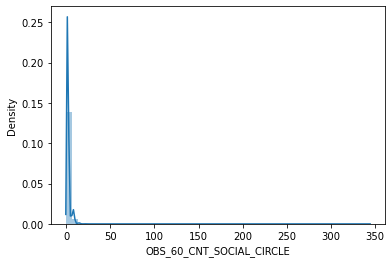

In [31]:
# Plot the data

sns.distplot(loan_data['OBS_60_CNT_SOCIAL_CIRCLE']) 
plt.show()

> <font color = Blue> Right-skewed data: we are imputing the missing values with median.

In [32]:
# Impute the missing values with median

loan_data.OBS_60_CNT_SOCIAL_CIRCLE.fillna(loan_data.OBS_60_CNT_SOCIAL_CIRCLE.median(), inplace = True)
loan_data.OBS_60_CNT_SOCIAL_CIRCLE.isnull().sum()

0

#### <font color = Green> Imputation of missing value 11 <br> Column name: 'DEF_60_CNT_SOCIAL_CIRCLE', Number of missing values: 1021, Percentage of missing values: 0.3320

In [33]:
# Check descriptive statistics

print('Mode of the series', loan_data.DEF_60_CNT_SOCIAL_CIRCLE.mode())
loan_data['DEF_60_CNT_SOCIAL_CIRCLE'].describe()

Mode of the series 0    0.0
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64


count    245148.000000
mean          0.100282
std           0.362876
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          24.000000
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64

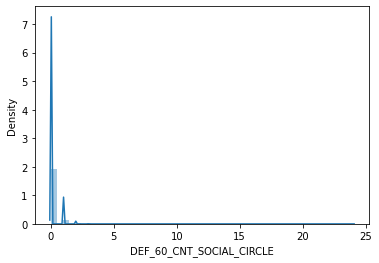

In [34]:
sns.distplot(loan_data['DEF_60_CNT_SOCIAL_CIRCLE']) 
plt.show()

> <font color = Blue> We are imputing the missing values with median, because we can see from above plot that the data has right-skewness.

In [35]:
# Replace missing values with median

loan_data.DEF_60_CNT_SOCIAL_CIRCLE.fillna(loan_data.DEF_60_CNT_SOCIAL_CIRCLE.median(), inplace = True)
loan_data.DEF_60_CNT_SOCIAL_CIRCLE.isnull().sum()

0

#### <font color = Green> Imputation of missing value 12 <br> Column name: 'DAYS_LAST_PHONE_CHANGE', Number of missing values: 1, Percentage of missing values: 0.0003

> <font color = Blue> The counts of missing values is very small. We are deciding to drop them.

In [36]:
# Drop the missing values

loan_data.dropna(subset = ['DAYS_LAST_PHONE_CHANGE'], inplace = True)
loan_data.DAYS_LAST_PHONE_CHANGE.isnull().sum()

0

#### <font color = Green> Imputation of missing value 13 <br> Column name: 'AMT_REQ_CREDIT_BUREAU_HOUR', Number of missing values:  41519, Percentage of missing values: 13.5016

In [37]:
# Check descriptive statistics of the series

print('Mode of the series:', loan_data.AMT_REQ_CREDIT_BUREAU_HOUR.mode())
loan_data['AMT_REQ_CREDIT_BUREAU_HOUR'].describe()

Mode of the series: 0    0.0
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64


count    245895.000000
mean          0.006413
std           0.083997
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

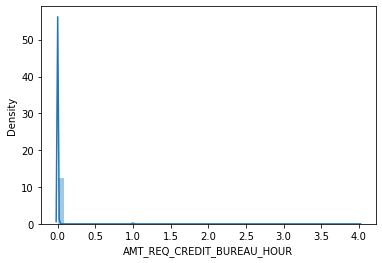

In [38]:
# Plot the series

sns.distplot(loan_data['AMT_REQ_CREDIT_BUREAU_HOUR']) 
plt.show()

> <font color = Blue> The series has slight righ-skewness. Mode or median, with value zero each, seem suitable for imputing the missing values.

In [39]:
# Impute missing values with median

loan_data.AMT_REQ_CREDIT_BUREAU_HOUR.fillna(loan_data.AMT_REQ_CREDIT_BUREAU_HOUR.median(), inplace=True)
loan_data.AMT_REQ_CREDIT_BUREAU_HOUR.isnull().sum()

0

#### <font color = Green> Imputation of missing value 14 <br> Column name: 'AMT_REQ_CREDIT_BUREAU_DAY', Number of missing values:  41519, Percentage of missing values: 13.5016

In [40]:
# Check descriptive statistics

loan_data['AMT_REQ_CREDIT_BUREAU_DAY'].describe()

count    245895.000000
mean          0.006901
std           0.110369
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

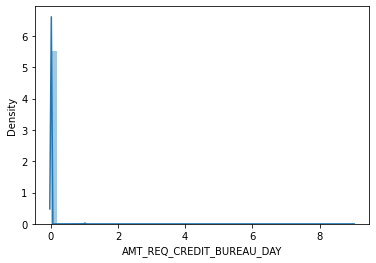

Mode of the series: 0    0.0
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64


In [41]:
# Plot the series

sns.distplot(loan_data['AMT_REQ_CREDIT_BUREAU_DAY']) 
plt.show()

# Print the mode

print('Mode of the series:', loan_data.AMT_REQ_CREDIT_BUREAU_DAY.mode())

> <font color = Blue> We are imputing the missing values with median, which is zero. Actually, mode and median are the same as shown above. Both these measures are suitable for imputaion of missing values.

In [42]:
# Replace missing values with median

loan_data.AMT_REQ_CREDIT_BUREAU_DAY.fillna(loan_data.AMT_REQ_CREDIT_BUREAU_DAY.median(), inplace = True)
loan_data.AMT_REQ_CREDIT_BUREAU_DAY.isnull().sum()

0

#### <font color = Green> Imputation of missing value 15 <br> Column name: 'AMT_REQ_CREDIT_BUREAU_WEEK', Number of missing values:  41519, Percentage of missing values: 13.5016

In [43]:
# Check descriptive statistics

loan_data['AMT_REQ_CREDIT_BUREAU_WEEK'].describe()

count    245895.000000
mean          0.034360
std           0.203996
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

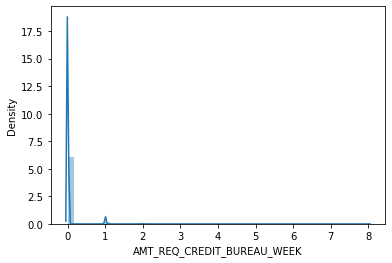

In [44]:
# Plot the series for farther understanding

sns.distplot(loan_data['AMT_REQ_CREDIT_BUREAU_WEEK']) 
plt.show()

> <font color = Blue> The right skewness of the series makes median the best central measure to impute the missing values with.

In [45]:
# Impute missing values with median

loan_data.AMT_REQ_CREDIT_BUREAU_WEEK.fillna(loan_data.AMT_REQ_CREDIT_BUREAU_WEEK.median(), inplace=True)
loan_data.AMT_REQ_CREDIT_BUREAU_WEEK.isnull().sum()

0

#### <font color = Green> Imputation of missing value 16 <br> Column name: 'AMT_REQ_CREDIT_BUREAU_MON', Number of missing values:  41519, Percentage of missing values: 13.5016

In [46]:
# Check descriptive statistics

loan_data['AMT_REQ_CREDIT_BUREAU_MON'].describe()

count    245895.000000
mean          0.276004
std           0.939840
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          27.000000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

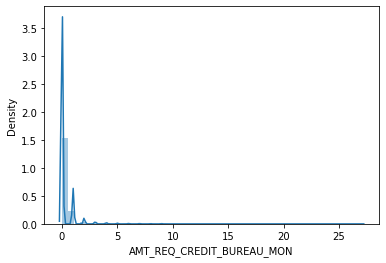

In [47]:
# Plot the series

sns.distplot(loan_data['AMT_REQ_CREDIT_BUREAU_MON']) 
plt.show()

> <font color = Blue> It's a series with right skewness, and we are imputing the missing values with median, which is zero.

In [48]:
# Replace missing values with median

loan_data.AMT_REQ_CREDIT_BUREAU_MON.fillna(loan_data.AMT_REQ_CREDIT_BUREAU_MON.median(), inplace=True)
loan_data.AMT_REQ_CREDIT_BUREAU_MON.isnull().sum()

0

#### <font color = Green> Imputation of missing value 17 <br> Column name: 'AMT_REQ_CREDIT_BUREAU_QRT', Number of missing values:  41519, Percentage of missing values: 13.5016

In [49]:
# Check central tendency measures for the series

loan_data['AMT_REQ_CREDIT_BUREAU_QRT'].describe()

count    245895.000000
mean          0.263751
std           0.609427
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

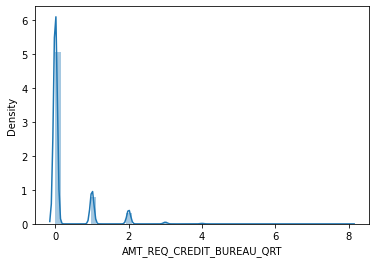

In [50]:
# Plot the series for better understanding

sns.distplot(loan_data['AMT_REQ_CREDIT_BUREAU_QRT']) 
plt.show()

In [51]:
# Check the mode

loan_data['AMT_REQ_CREDIT_BUREAU_QRT'].mode()

0    0.0
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

> <font color = Blue> We are imputing the missing values of this right-skewed series with median/mode.

In [52]:
# Impute the missing values with mode/median

loan_data.AMT_REQ_CREDIT_BUREAU_QRT.fillna(loan_data.AMT_REQ_CREDIT_BUREAU_QRT.median(), inplace = True)
loan_data.AMT_REQ_CREDIT_BUREAU_QRT.isnull().sum()

0

#### <font color = Green> Imputation of missing value 18 <br> Column name: 'AMT_REQ_CREDIT_BUREAU_YEAR', Number of missing values:  41519, Percentage of missing values: 13.5016

In [53]:
# Check descriptive statistics

loan_data['AMT_REQ_CREDIT_BUREAU_YEAR'].describe()

count    245895.000000
mean          1.897025
std           1.860042
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          23.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

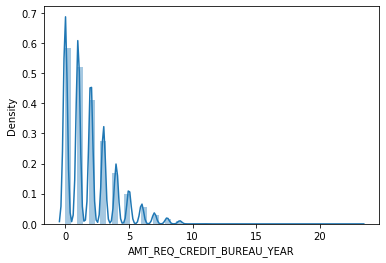

In [54]:
# Plot the series for better understanding

sns.distplot(loan_data['AMT_REQ_CREDIT_BUREAU_YEAR']) 
plt.show()

> <font color = Blue> For this right-skewed data, we are imputing the missing values with median, which is 1

In [55]:
# Impute the missing values with median

loan_data.AMT_REQ_CREDIT_BUREAU_YEAR.fillna(loan_data.AMT_REQ_CREDIT_BUREAU_YEAR.median(), inplace = True)
loan_data.AMT_REQ_CREDIT_BUREAU_YEAR.isnull().sum()

0

In [56]:
# Check null values present in the dataframe

loan_data.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
OCCUPATION_TYPE                0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RAT

## <font color = Blue> Up till here, we have treated all the null values by different approaches. At every step, we tried to state a reason or given explanation for why we are doing what we are doing. 
> <font color = Blue> After completing the missing value treatment, we will now remove the unwanted columns before performing analysis.

### <font color = Green> Step 2. Removal of unwanted columns: loan_data (application_data.csv)

#### <font color = Green> A great way to check if a column is useful for analysis or not is to check the variability of the data points in the column. In case of very low or zero variability (i.e. constant value), we can safely assume that the column doesn't contribute much to analysis, and we can delete the column. 

In [57]:
# Check variance of numeric columns

loan_data.var()

SK_ID_CURR                     1.057262e+10
TARGET                         7.163538e-02
CNT_CHILDREN                   5.280456e-01
AMT_INCOME_TOTAL               6.598225e+10
AMT_CREDIT                     1.639268e+11
AMT_ANNUITY                    2.054487e+08
AMT_GOODS_PRICE                1.380041e+11
REGION_POPULATION_RELATIVE     1.875347e-04
DAYS_BIRTH                     1.847885e+07
DAYS_EMPLOYED                  1.993305e+10
DAYS_REGISTRATION              1.239266e+07
DAYS_ID_PUBLISH                2.218523e+06
FLAG_MOBIL                     0.000000e+00
FLAG_EMP_PHONE                 1.474024e-01
FLAG_WORK_PHONE                1.592181e-01
FLAG_CONT_MOBILE               1.976606e-03
FLAG_PHONE                     2.047533e-01
FLAG_EMAIL                     5.499229e-02
CNT_FAM_MEMBERS                8.307146e-01
REGION_RATING_CLIENT           2.523993e-01
REGION_RATING_CLIENT_W_CITY    2.468933e-01
HOUR_APPR_PROCESS_START        1.051049e+01
REG_REGION_NOT_LIVE_REGION     1

> <font color = Blue> From the above output, we observe that there is not a single column present in the dataset has very low or zero variabilty. Therefore, based on variation output, we can't remove a column. <br>
We will, instead, check description of each column and decide whether a column is essential for our analysis or not.<br>
   

In [58]:
# Check shape of updated data

loan_data.shape

(245895, 73)

In [59]:
# Based on our judgement, we have decided to remove following 28 unwanted columns

unwanted_cols = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
                 'REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 
                 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
                 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
                 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19',
                 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

loan_data.drop(labels = unwanted_cols, axis = 1, inplace = True)
loan_data.shape

(245895, 45)

In [60]:
# Display updated dataset

loan_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,Laborers,1.0,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,Laborers,1.0,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,-16941,-1588,-4970.0,-477,Laborers,2.0,WEDNESDAY,16,0,0,0,0,0,0,Other,0.354225,0.621226,0.0,0.0,0.0,0.0,-2536.0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,1395000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.035792,-13778,-3130,-1213.0,-619,Accountants,3.0,SUNDAY,16,0,0,0,0,0,0,Business Entity Type 3,0.724000,0.492060,1.0,0.0,1.0,0.0,-1562.0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,1530000.0,Unaccompanied,State servant,Higher education,Married,House / apartment,0.003122,-18850,-449,-4597.0,-2379,Managers,2.0,MONDAY,16,0,0,0,0,1,1,Other,0.714279,0.540654,2.0,0.0,2.0,0.0,-1070.0,0.0,0.0,0.0,0.0,0.0,0.0


### <font color = Green> Step 3. Treating XNA values in loan_data (application_data.csv)
    
There are 12 categorical columns in the updated dataset: 'ORGANIZATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'OCCUPATION_TYPE', 'NAME_HOUSING_TYPE', 'NAME_FAMILY_STATUS', 'NAME_EDUCATION_TYPE', 'NAME_INCOME_TYPE', 'NAME_TYPE_SUITE', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY'.

In [61]:
# Check number of XNA values present in the columns

print('XNA in ORGANIZATION_TYPE:', len(loan_data[loan_data['ORGANIZATION_TYPE'] == 'XNA']))
print('XNA in WEEKDAY_APPR_PROCESS_START:', len(loan_data[loan_data['WEEKDAY_APPR_PROCESS_START'] == 'XNA']))
print('XNA in OCCUPATION_TYPE:', len(loan_data[loan_data['OCCUPATION_TYPE'] == 'XNA']))
print('XNA in NAME_HOUSING_TYPE:', len(loan_data[loan_data['NAME_HOUSING_TYPE'] == 'XNA']))
print('XNA in NAME_FAMILY_STATUS:', len(loan_data[loan_data['NAME_FAMILY_STATUS'] == 'XNA']))
print('XNA in NAME_EDUCATION_TYPE:', len(loan_data[loan_data['NAME_EDUCATION_TYPE'] == 'XNA']))
print('XNA in NAME_INCOME_TYPE:', len(loan_data[loan_data['NAME_INCOME_TYPE'] == 'XNA']))
print('XNA in NAME_TYPE_SUITE:', len(loan_data[loan_data['NAME_TYPE_SUITE'] == 'XNA']))
print('XNA in NAME_CONTRACT_TYPE:', len(loan_data[loan_data['NAME_CONTRACT_TYPE'] == 'XNA']))
print('XNA in CODE_GENDER:', len(loan_data[loan_data['CODE_GENDER'] == 'XNA']))
print('XNA in FLAG_OWN_CAR:', len(loan_data[loan_data['FLAG_OWN_CAR'] == 'XNA']))
print('XNA in FLAG_OWN_REALTY:', len(loan_data[loan_data['FLAG_OWN_REALTY'] == 'XNA']))

XNA in ORGANIZATION_TYPE: 44176
XNA in WEEKDAY_APPR_PROCESS_START: 0
XNA in OCCUPATION_TYPE: 0
XNA in NAME_HOUSING_TYPE: 0
XNA in NAME_FAMILY_STATUS: 0
XNA in NAME_EDUCATION_TYPE: 0
XNA in NAME_INCOME_TYPE: 0
XNA in NAME_TYPE_SUITE: 0
XNA in NAME_CONTRACT_TYPE: 0
XNA in CODE_GENDER: 4
XNA in FLAG_OWN_CAR: 0
XNA in FLAG_OWN_REALTY: 0


> <font color = Blue> There are two columns, namely, 'ORGANIZATION_TYPE' and 'CODE_GENDER' with 'XNA' values. We will update them with appropriate alternatives.

In [62]:
# Check the 'XNA' values in the column 'ORGANIZATION_TYPE' and decide on what to do with them

loan_data['ORGANIZATION_TYPE'].value_counts()

Business Entity Type 3    53625
XNA                       44176
Self-employed             28697
Other                     13444
Medicine                   9533
Business Entity Type 2     8850
Government                 8738
School                     7523
Trade: type 7              5976
Kindergarten               5785
Construction               5216
Business Entity Type 1     4917
Transport: type 4          4319
Industry: type 9           2874
Trade: type 3              2789
Industry: type 3           2678
Security                   2597
Housing                    2408
Industry: type 11          2222
Military                   2209
Bank                       2103
Police                     2047
Transport: type 2          1942
Agriculture                1869
Security Ministries        1749
Postal                     1718
Trade: type 2              1438
Restaurant                 1364
Services                   1211
University                 1109
Industry: type 7           1093
Transpor

> <font color = Blue> In the attribute 'ORGANIZATION_TYPE', 'XNA' should not be imputed with mode 'Business Entity Type 3'. There are large number of 'XNA' values present, and imputing them with mode will exaggerate the mode variable. Dropping such large number of 'XNA' values is also ruled out, as it will remove many rows. 
    >> We are replacing 'XNA' with 'Unknown Organization type' for easy identification and to get more insights in analysis from this variable.

In [63]:
# Impute with mode

loan_data.loc[loan_data['ORGANIZATION_TYPE'] == 'XNA', 'ORGANIZATION_TYPE'] = 'Unknown Organization type'
loan_data['ORGANIZATION_TYPE'].value_counts()

Business Entity Type 3       53625
Unknown Organization type    44176
Self-employed                28697
Other                        13444
Medicine                      9533
Business Entity Type 2        8850
Government                    8738
School                        7523
Trade: type 7                 5976
Kindergarten                  5785
Construction                  5216
Business Entity Type 1        4917
Transport: type 4             4319
Industry: type 9              2874
Trade: type 3                 2789
Industry: type 3              2678
Security                      2597
Housing                       2408
Industry: type 11             2222
Military                      2209
Bank                          2103
Police                        2047
Transport: type 2             1942
Agriculture                   1869
Security Ministries           1749
Postal                        1718
Trade: type 2                 1438
Restaurant                    1364
Services            

In [64]:
# Check the 'XNA' values in the column 'CODE_GENDER' and decide on what to do with them

loan_data['CODE_GENDER'].value_counts()

F      163369
M       82522
XNA         4
Name: CODE_GENDER, dtype: int64

> <font color = Blue> There are only 4 counts of 'XNA' values. We are dropping them. 

In [65]:
# Drop 'XNA' values

loan_data = loan_data[loan_data.CODE_GENDER != 'XNA']
loan_data.CODE_GENDER.value_counts()

F    163369
M     82522
Name: CODE_GENDER, dtype: int64

### <font color = Green> Step 4. Treat the columns having negative values of dates and days. 
   There are 5 such columns: 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE'

In [66]:
# Convert the negative values to absolute values

loan_data['DAYS_BIRTH'] = abs(loan_data['DAYS_BIRTH'])
loan_data['DAYS_EMPLOYED'] = abs(loan_data['DAYS_EMPLOYED'])
loan_data['DAYS_REGISTRATION'] = abs(loan_data['DAYS_REGISTRATION'])
loan_data['DAYS_ID_PUBLISH'] = abs(loan_data['DAYS_ID_PUBLISH'])
loan_data['DAYS_LAST_PHONE_CHANGE'] = abs(loan_data['DAYS_LAST_PHONE_CHANGE'])

In [67]:
# Display the data

display("loan_data: application_data")
display(loan_data.head())

'loan_data: application_data'

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,Laborers,1.0,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,Laborers,1.0,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,16941,1588,4970.0,477,Laborers,2.0,WEDNESDAY,16,0,0,0,0,0,0,Other,0.354225,0.621226,0.0,0.0,0.0,0.0,2536.0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,1395000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.035792,13778,3130,1213.0,619,Accountants,3.0,SUNDAY,16,0,0,0,0,0,0,Business Entity Type 3,0.724000,0.492060,1.0,0.0,1.0,0.0,1562.0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,1530000.0,Unaccompanied,State servant,Higher education,Married,House / apartment,0.003122,18850,449,4597.0,2379,Managers,2.0,MONDAY,16,0,0,0,0,1,1,Other,0.714279,0.540654,2.0,0.0,2.0,0.0,1070.0,0.0,0.0,0.0,0.0,0.0,0.0


### <font color = Green> Step 5. Separating numeric and categorical columns

In [68]:
# Separate the columns

categorical_col = [i for i in loan_data.select_dtypes(include = np.object).columns]
numeric_col = [i for i in loan_data.select_dtypes(include = np.number).columns if i not in ['SK_ID_CURR'] + [ 'TARGET']]

In [69]:
# Check the lengths of both the column types

print(len(categorical_col))
print(len(numeric_col))

12
31


In [70]:
# Check the dataframe shape to check if there is mismatch in total number of columns 

loan_data.shape

(245891, 45)

> <font color = Blue> There are total 45 columns in the updated dataframe. Out of these, 12 are categorical, 31 are numeric and two unconverted columns are 'SK_ID_CURR' and 'TARGET'.

In [71]:
# Print the categorical columns

print('Categorical Columns', "\n")
for i in range(len(categorical_col)):
    print(categorical_col[i])

Categorical Columns 

NAME_CONTRACT_TYPE
CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
OCCUPATION_TYPE
WEEKDAY_APPR_PROCESS_START
ORGANIZATION_TYPE


In [72]:
# Print the numeric columns

print('Numeric Columns', "\n")
for i in range(len(numeric_col)):
    print(numeric_col[i])

Numeric Columns 

CNT_CHILDREN
AMT_INCOME_TOTAL
AMT_CREDIT
AMT_ANNUITY
AMT_GOODS_PRICE
REGION_POPULATION_RELATIVE
DAYS_BIRTH
DAYS_EMPLOYED
DAYS_REGISTRATION
DAYS_ID_PUBLISH
CNT_FAM_MEMBERS
HOUR_APPR_PROCESS_START
REG_REGION_NOT_LIVE_REGION
REG_REGION_NOT_WORK_REGION
LIVE_REGION_NOT_WORK_REGION
REG_CITY_NOT_LIVE_CITY
REG_CITY_NOT_WORK_CITY
LIVE_CITY_NOT_WORK_CITY
EXT_SOURCE_2
EXT_SOURCE_3
OBS_30_CNT_SOCIAL_CIRCLE
DEF_30_CNT_SOCIAL_CIRCLE
OBS_60_CNT_SOCIAL_CIRCLE
DEF_60_CNT_SOCIAL_CIRCLE
DAYS_LAST_PHONE_CHANGE
AMT_REQ_CREDIT_BUREAU_HOUR
AMT_REQ_CREDIT_BUREAU_DAY
AMT_REQ_CREDIT_BUREAU_WEEK
AMT_REQ_CREDIT_BUREAU_MON
AMT_REQ_CREDIT_BUREAU_QRT
AMT_REQ_CREDIT_BUREAU_YEAR


In [73]:
# Cast all variables in the numeric columns to numeric values

loan_data[numeric_col] = loan_data[numeric_col].apply(pd.to_numeric)
loan_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,Laborers,1.0,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,Laborers,1.0,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,16941,1588,4970.0,477,Laborers,2.0,WEDNESDAY,16,0,0,0,0,0,0,Other,0.354225,0.621226,0.0,0.0,0.0,0.0,2536.0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,1395000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.035792,13778,3130,1213.0,619,Accountants,3.0,SUNDAY,16,0,0,0,0,0,0,Business Entity Type 3,0.724000,0.492060,1.0,0.0,1.0,0.0,1562.0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,1530000.0,Unaccompanied,State servant,Higher education,Married,House / apartment,0.003122,18850,449,4597.0,2379,Managers,2.0,MONDAY,16,0,0,0,0,1,1,Other,0.714279,0.540654,2.0,0.0,2.0,0.0,1070.0,0.0,0.0,0.0,0.0,0.0,0.0


## <font color = Blue> The data processing part for 'application_data.csv' ends here. The data is suitable for analysis according to us.

# Plan for analysis
><font color = Blue> 1. Analyze loan_data: application_data.csv<br>
    

# Analysis of loan_data: application_data.csv

In [74]:
# Print the shape

loan_data.shape

(245891, 45)

In [75]:
loan_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,Laborers,1.0,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,Laborers,1.0,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,16941,1588,4970.0,477,Laborers,2.0,WEDNESDAY,16,0,0,0,0,0,0,Other,0.354225,0.621226,0.0,0.0,0.0,0.0,2536.0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,1395000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.035792,13778,3130,1213.0,619,Accountants,3.0,SUNDAY,16,0,0,0,0,0,0,Business Entity Type 3,0.724000,0.492060,1.0,0.0,1.0,0.0,1562.0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,1530000.0,Unaccompanied,State servant,Higher education,Married,House / apartment,0.003122,18850,449,4597.0,2379,Managers,2.0,MONDAY,16,0,0,0,0,1,1,Other,0.714279,0.540654,2.0,0.0,2.0,0.0,1070.0,0.0,0.0,0.0,0.0,0.0,0.0


### <font color = Green> Imbalance analysis

#### Variable: 'TARGET'

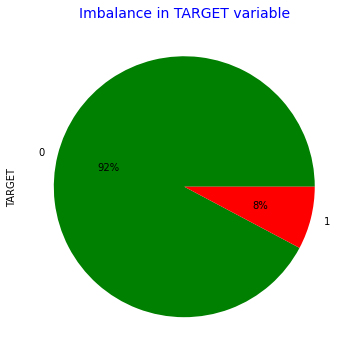

In [76]:
# Plot the two groups in the variable

fig = plt.figure(figsize = (6, 6))
loan_data["TARGET"].value_counts().plot.pie(colors = ['green', 'red'], autopct = "%1.0f%%")
plt.title('Imbalance in TARGET variable', color = 'Blue', fontsize = 14)      
plt.show()

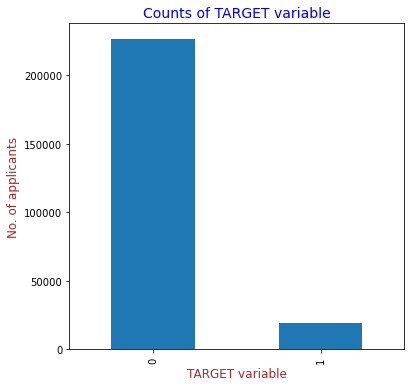

In [77]:
# Plot bars for both target groups

fig = plt.figure(figsize = (6, 6))
ax = loan_data["TARGET"].value_counts().plot(kind = "bar")
plt.title('Counts of TARGET variable', color = 'Blue', fontsize = 14)
plt.xlabel('TARGET variable', color = 'Brown', fontsize = 12)
plt.ylabel('No. of applicants', color = 'Brown', fontsize = 12)
plt.show()    

#### Variable: 'CODE_GENDER'

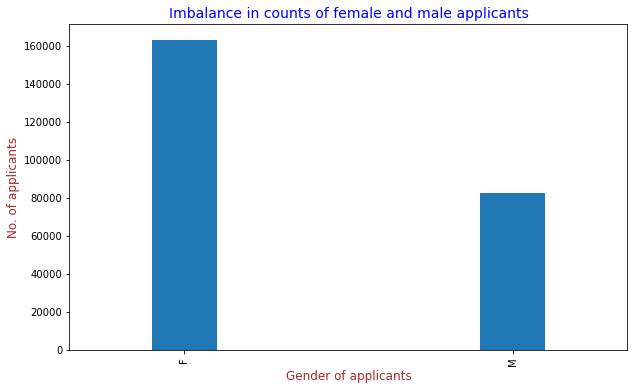

In [78]:
# Plot the counts of two gender groups: 'M' and 'F'

fig = plt.figure(figsize = (10, 6))
loan_data["CODE_GENDER"].value_counts().plot.bar(width = 0.2, align = 'center')
plt.title('Imbalance in counts of female and male applicants', color = 'Blue', fontsize = 14)
plt.ylabel('No. of applicants', color = 'Brown', fontsize = 12)
plt.xlabel('Gender of applicants', color = 'Brown', fontsize = 12)
plt.show()                        

> <font color = Blue> There are clear imbalances between the groups in each of the above two variables. Only 8% of applicants have payment difficulties. Number of female applicants exceeds number of male applicants. We are combining both variables to see what is the gender-wise imbalances in loan repayment difficulties below:

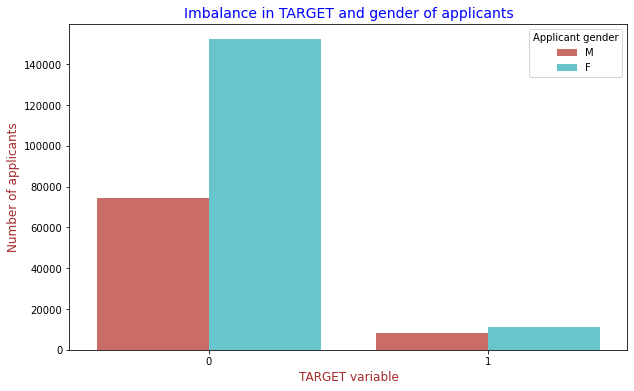

In [79]:
# Plot to visualize the imbalance by gender

plt.figure(figsize = (10, 6))
sns.countplot(data = loan_data, x= 'TARGET', order = loan_data.TARGET.value_counts().index, hue = 'CODE_GENDER', palette = 'hls') 
plt.legend(title= 'Applicant gender', bbox_to_anchor=(1, 1), loc = 'upper right')
plt.title('Imbalance in TARGET and gender of applicants', fontsize = 14, color = 'Blue')
plt.ylabel('Number of applicants', color = 'Brown', fontsize = 12)
plt.xlabel('TARGET variable', color = 'Brown', fontsize = 12)
plt.show()

> <font color = Blue> Observation:<br>
<font color = Blue>1. Overall, applicants with payment difficulty is low, only 8%. After analysing the distribution of the 'TARGET' variable in terms of gender, we see that number of female applicants with NO payment difficulty surpasses the number of male applicants in a significant way.<br>
<font color = Blue>2. With visual interpretation of the above plot, we can say that female applicants WITH payment difficulty is relatively higher than male applicants. However, the ratio of female to male applicants here doesn't seem as large as it is in the first case.<br>
<font color = Blue>3. A ratio analysis can be done to confirm if female applicants are less risky than male applicants.  

#### <font color = Green> Creating bins for further analysis. Variables: 'AMT_INCOME_TOTAL' and 'AMT_CREDIT'

In [80]:
# Creating bins for 'AMT_INCOME_TOTAL'

bins = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]
ranges = ['0-25000', '25000-50000','50000-75000','75000,100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
       '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
       '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']

loan_data['AMT_INCOME_RANGE'] = pd.cut(loan_data['AMT_INCOME_TOTAL'], bins, labels = ranges)

In [81]:
# Print the ranges

loan_data['AMT_INCOME_RANGE'].value_counts()

125000-150000       38130
100000-125000       34120
200000-225000       33777
75000,100000        30315
150000-175000       28131
175000-200000       24273
50000-75000         14116
250000-275000       10705
225000-250000        6223
300000-325000        5733
350000-375000        3853
275000-300000        3709
25000-50000          3094
425000-450000        2603
500000 and above     2277
325000-350000        1810
400000-425000        1549
375000-400000        1089
475000-500000         272
450000-475000         112
0-25000                 0
Name: AMT_INCOME_RANGE, dtype: int64

In [82]:
# Creating bins for 'AMT_CREDIT'

bins = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000000]
ranges = ['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000',
        '450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000',
        '800000-850000','850000-900000','900000 and above']

loan_data['AMT_CREDIT_RANGE'] = pd.cut(loan_data['AMT_CREDIT'], bins = bins, labels = ranges)

In [83]:
# Print counts of the variable

loan_data['AMT_CREDIT_RANGE'].value_counts()

900000 and above    48643
250000-300000       24834
500000-550000       18220
200000-250000       18028
400000-450000       14587
0-150000            13924
150000-200000       13485
300000-350000       12830
650000-700000       12451
450000-500000       10874
750000-800000       10096
800000-850000        9503
550000-600000        9289
850000-900000        8406
350000-400000        8070
600000-650000        7210
700000-750000        5441
Name: AMT_CREDIT_RANGE, dtype: int64

### <font color = Green> Group the Target variable according to payment difficulties <br>
target_1 = people with payment difficulties <br>
target_0 = people with NO payment difficulties

In [84]:
# Group the data

target_1 = loan_data.loc[loan_data['TARGET'] == 1]
target_0 = loan_data.loc[loan_data['TARGET'] == 0]

print(target_1.value_counts().sum())
print(target_0.value_counts().sum())

19098
226793


### <font color = Green> Distribution of income in TARGET groups and gender

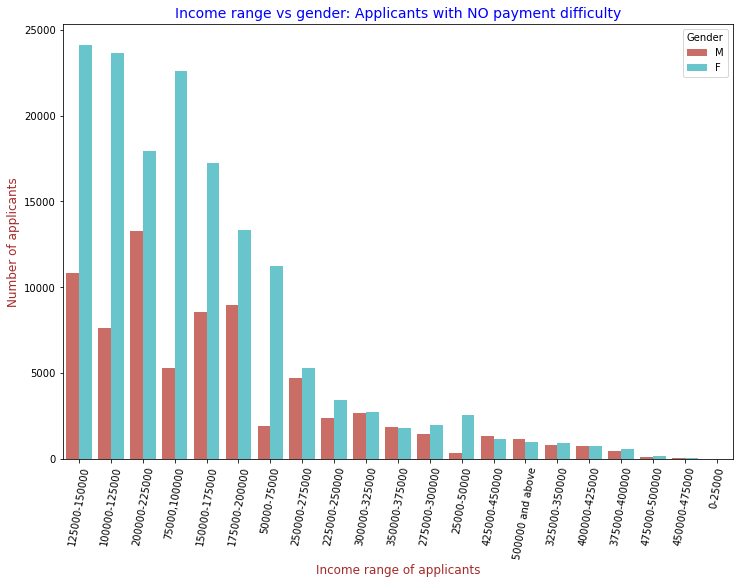

In [85]:
# Plot: No. of applicants with NO payment difficulty & their income range: male and female  

plt.figure(figsize = (12, 8))
sns.countplot(data = target_0, x = 'AMT_INCOME_RANGE', order = target_0.AMT_INCOME_RANGE.value_counts().index, hue = 'CODE_GENDER', palette='hls') 
plt.legend(title = 'Gender', bbox_to_anchor = (1, 1), loc = 'upper right')
plt.xticks(rotation = 80)
plt.ylabel('Number of applicants', color = 'Brown', fontsize = 12)
plt.xlabel('Income range of applicants', color = 'Brown', fontsize = 12)
plt.title('Income range vs gender: Applicants with NO payment difficulty', fontsize = 14, color = 'Blue')
plt.show()

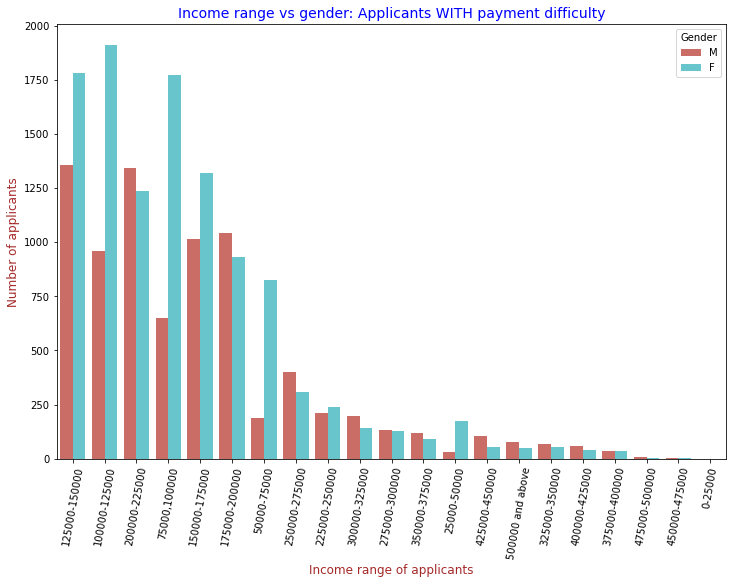

In [86]:
# Plot: No. of applicants WITH payment difficulty & their income range: male and female  

plt.figure(figsize = (12, 8))
sns.countplot(data = target_1, x = 'AMT_INCOME_RANGE', order = target_1.AMT_INCOME_RANGE.value_counts().index, hue = 'CODE_GENDER', palette='hls') 
plt.legend(title = 'Gender', bbox_to_anchor = (1, 1), loc = 'upper right')
plt.xticks(rotation = 80)
plt.ylabel('Number of applicants', color = 'Brown', fontsize = 12)
plt.xlabel('Income range of applicants', color = 'Brown', fontsize = 12)
plt.title('Income range vs gender: Applicants WITH payment difficulty', fontsize = 14, color = 'Blue')
plt.show()

#### <font color = Blue> Observations from plots: 
> <font color = Blue> 1. Number of female applicants is higher than the number of male applicants in majority of income ranges for both the TARGET groups.<br>
    2. Higher number of applicants from medium income range has payment difficulty/default probability as compared to number of applicants from very low or very high income group.<br>
    3. Number of applicants with very high (450000-475000) or very low income (0-25000) ranges is relatively small.<br>
    4. Highest number of female applicants in target_0 and target_1 belongs to the income range: (125000-150000) and (100000-125000) respectively.

### <font color = Green> Is probability to default related to a particular gender? Let's check:

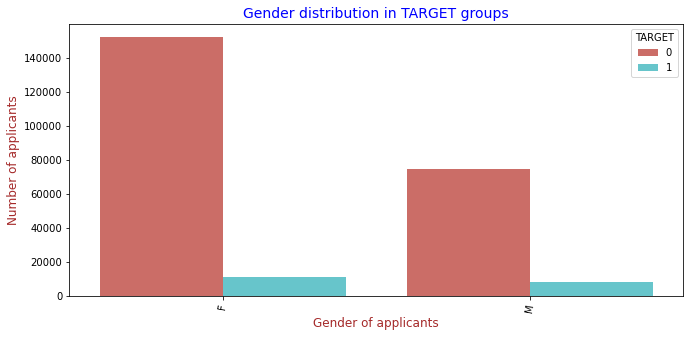

In [87]:
# Plot: Gender versus payment difficulty

plt.figure(figsize = (11, 5))
sns.countplot(data = loan_data, x = 'CODE_GENDER', order = loan_data.CODE_GENDER.value_counts().index, hue = 'TARGET', palette='hls') 
plt.legend(title = 'TARGET', bbox_to_anchor = (1, 1), loc = 'upper right')
plt.xticks(rotation = 80)
plt.ylabel('Number of applicants', color = 'Brown', fontsize = 12)
plt.xlabel('Gender of applicants', color = 'Brown', fontsize = 12)
plt.title('Gender distribution in TARGET groups', fontsize = 14, color = 'Blue')
plt.show()

#### <font color = Blue> Observation:<br>
<font color = Blue>1. The ratio of number of probable repayers to defaulters seems much higher in Female applicants than Male applicants.<br>
<font color = Blue>2. Is it enough evidence to suggest that Female applicants are comparetively less riskier as compare to male applicants? Probably we will need to perform some ratio analysis to conclude that. 

In [88]:
# Check the ratio of repayer to defaulter for different gender groups

repay_to_default_male = (target_0[target_0["CODE_GENDER"] == 'M'].value_counts().sum()) / target_1[target_1["CODE_GENDER"] == 'M'].value_counts().sum()
print('Repayer/Defaulter Male:', round(repay_to_default_male, 2))
repay_to_default_female = (target_0[target_0["CODE_GENDER"] == 'F'].value_counts().sum()) / target_1[target_1["CODE_GENDER"] == 'F'].value_counts().sum()
print('Repayer/Defaulter Female:', round(repay_to_default_female, 2))

Repayer/Defaulter Male: 9.32
Repayer/Defaulter Female: 13.72


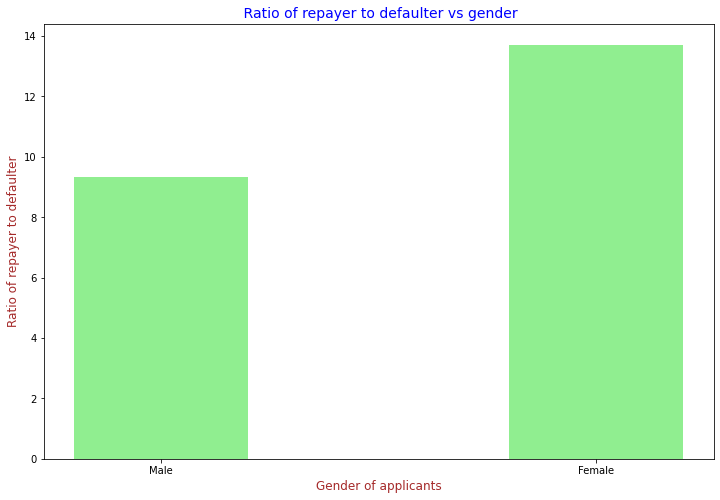

In [89]:
# Plot: Ratio of repayer to defaulter vs gender of applicants

fig = plt.figure(figsize=(12, 8))
repayer_to_defaulter = [repay_to_default_male, repay_to_default_female]
gender = ['Male', 'Female']
plt.ylabel('Ratio of repayer to defaulter', color = 'Brown', fontsize = 12)
plt.xlabel('Gender of applicants', color = 'Brown', fontsize = 12)
plt.title(" Ratio of repayer to defaulter vs gender", color = 'Blue', fontsize = 14)
plt.bar(gender, repayer_to_defaulter, color = 'Lightgreen', width = 0.4)
plt.show()

#### <font color = Blue> Observations: 
> <font color = Blue>  The ratio of number of repayers to defaulters for female applicants is considerably higher as compared to male applicants. We can now safely conclude that female applicants are relatively less risky than male applicants.<br>

### <font color = Green> Let us check how income groups are distributed against 'TARGET' variable. Can we conclude that a certain income range has highest or lowest default probability?

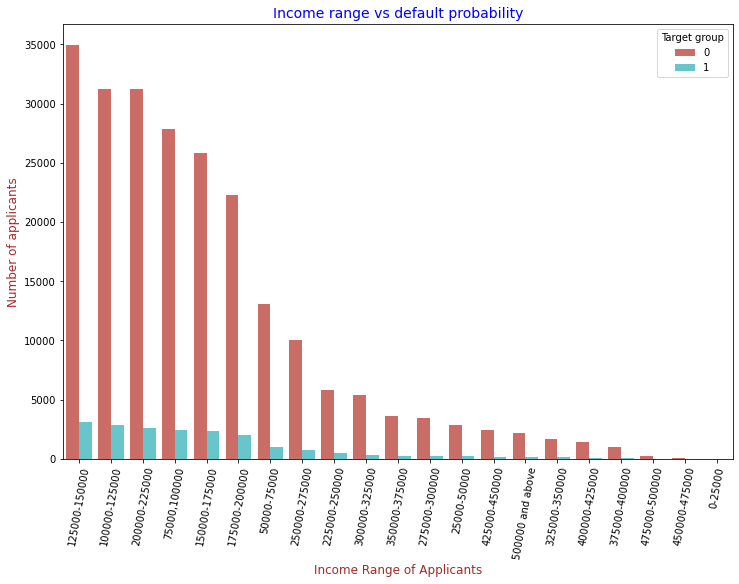

In [90]:
# Plot: Income Range versus payment difficulty  

plt.figure(figsize = (12, 8))
sns.countplot(data = loan_data, x = 'AMT_INCOME_RANGE', order = loan_data.AMT_INCOME_RANGE.value_counts().index, hue = 'TARGET', palette='hls') 
plt.legend(title = 'Target group', bbox_to_anchor = (1, 1), loc = 'upper right')
plt.xticks(rotation = 80)
plt.ylabel('Number of applicants', color = 'Brown', fontsize = 12)
plt.xlabel('Income Range of Applicants', color = 'Brown', fontsize = 12)
plt.title('Income range vs default probability', fontsize = 14, color = 'Blue')
plt.show()

#### <font color = Blue> Observations: 
> <font color = Blue> 1. Highest number of probable defaulters belongs to the income range: (125000-150000), followed by groups (100000-125000) and (200000-225000).<br>
    2. A significant ratio of applicants in very high income range: (500000 and above) has default probability. Maybe we can conclude here that wealth of applicants don't stop clients from defaulting. Therefore, highly wealthy applicants too should be evaluated carefully before advancing loans.<br>

### <font color = Green> Credit range for defaulters and repayers

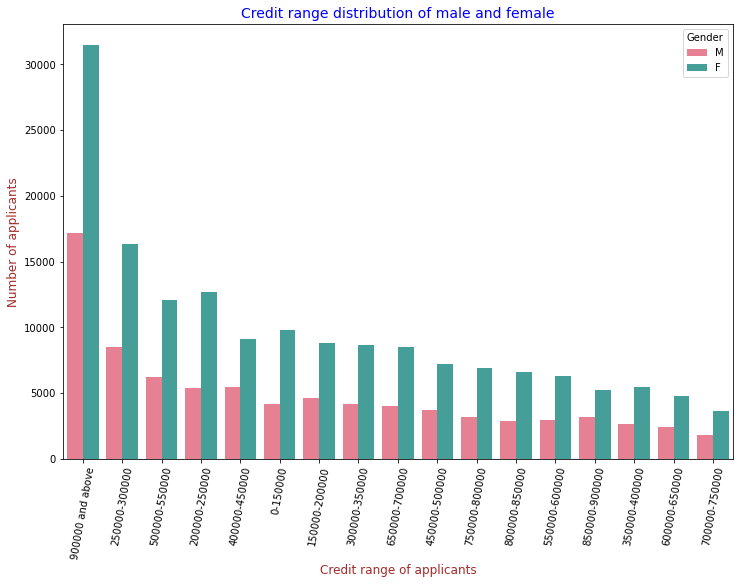

In [91]:
# Plot credit range of male and female applicants

plt.figure(figsize = (12, 8))
sns.countplot(data = loan_data, x = 'AMT_CREDIT_RANGE', order = loan_data.AMT_CREDIT_RANGE.value_counts().index, hue = 'CODE_GENDER', palette = 'husl') 
plt.legend(title = 'Gender', bbox_to_anchor = (1, 1), loc = 'upper right')
plt.xticks(rotation = 80)
plt.ylabel('Number of applicants', color = 'Brown', fontsize = 12)
plt.xlabel('Credit range of applicants', color = 'Brown', fontsize = 12)
plt.title('Credit range distribution of male and female', fontsize = 14, color = 'Blue')
plt.show()

#### <font color = Blue> Observation: 
<font color = Blue>1. Female applicants have higher credit range than male applicants.<br>
<font color = Blue>2. Highest number of female applicants belong to credit range: (900000 and above)

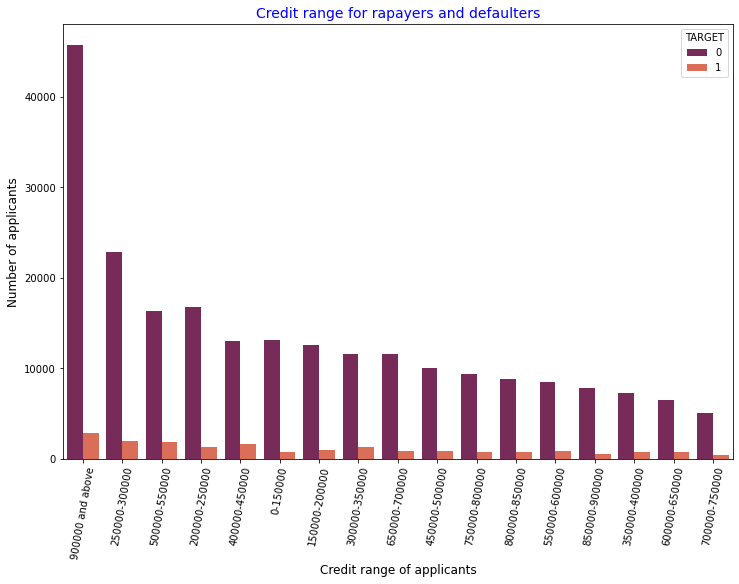

In [92]:
# Plot: Credit range versus TARGET

plt.figure(figsize = (12, 8))
sns.countplot(data = loan_data, x = 'AMT_CREDIT_RANGE', order = loan_data.AMT_CREDIT_RANGE.value_counts().index, hue = 'TARGET', palette = 'rocket') 
plt.legend(title = 'TARGET', bbox_to_anchor = (1, 1), loc = 'upper right')
plt.xticks(rotation = 80)
plt.ylabel('Number of applicants', color = 'Black', fontsize = 12)
plt.xlabel('Credit range of applicants', color = 'Black', fontsize = 12)
plt.title('Credit range for rapayers and defaulters', fontsize = 14, color = 'Blue')
plt.show()

#### <font color = Blue> Observations: 
<font color = Blue>1. Maximum number of probable repayers and defaulters belong to credit range (900000 and above). However, the ratio of repayers to defaulters in this group is comparetively small.<br>
<font color = Blue>2. Least number of repayers belong to credit range: (7000000-750000).

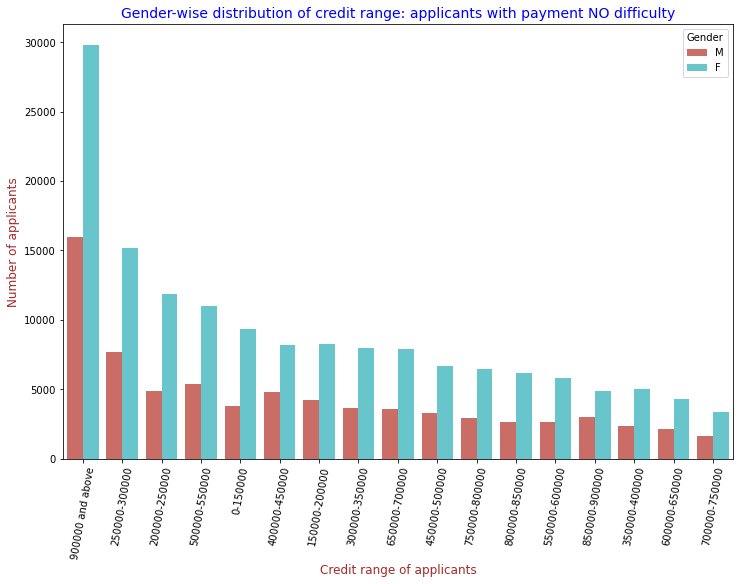

In [93]:
# Plot: Target_0 applicants vs Credit range: male and female  

plt.figure(figsize = (12, 8))
sns.countplot(data = target_0, x = 'AMT_CREDIT_RANGE', order = target_0.AMT_CREDIT_RANGE.value_counts().index, hue = 'CODE_GENDER', palette='hls') 
plt.legend(title = 'Gender', bbox_to_anchor = (1, 1), loc = 'upper right')
plt.xticks(rotation = 80)
plt.ylabel('Number of applicants', color = 'Brown', fontsize = 12)
plt.xlabel('Credit range of applicants', color = 'Brown', fontsize = 12)
plt.title('Gender-wise distribution of credit range: applicants with payment NO difficulty', fontsize = 14, color = 'Blue')
plt.show()

#### <font color = Blue> Observation: 
<font color = Blue> For all credit ranges, number of female repayers is more than male repayers.<br>

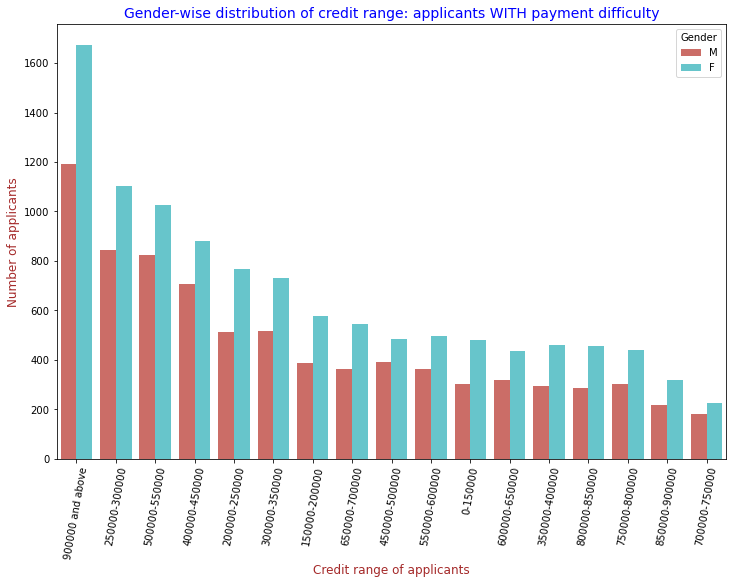

In [94]:
# Plot: Target_1 applicants vs Credit range: male and female  

plt.figure(figsize = (12, 8))
sns.countplot(data = target_1, x = 'AMT_CREDIT_RANGE', order = target_1.AMT_CREDIT_RANGE.value_counts().index, hue = 'CODE_GENDER', palette='hls') 
plt.legend(title = 'Gender', bbox_to_anchor = (1, 1), loc = 'upper right')
plt.xticks(rotation = 80)
plt.ylabel('Number of applicants', color = 'Brown', fontsize = 12)
plt.xlabel('Credit range of applicants', color = 'Brown', fontsize = 12)
plt.title('Gender-wise distribution of credit range: applicants WITH payment difficulty', fontsize = 14, color = 'Blue')
plt.show()

#### <font color = Blue> Observation: 
> <font color = Blue> For all credit ranges, female defaulters dominate their male counterparts.<br>

### <font color = Green> Income type and payment possibility

In [95]:
# Variable counts in 'NAME_INCOME_TYPE'

loan_data["NAME_INCOME_TYPE"].value_counts()

Working                 126637
Commercial associate     56634
Pensioner                44179
State servant            18418
Student                     14
Unemployed                   5
Businessman                  4
Name: NAME_INCOME_TYPE, dtype: int64

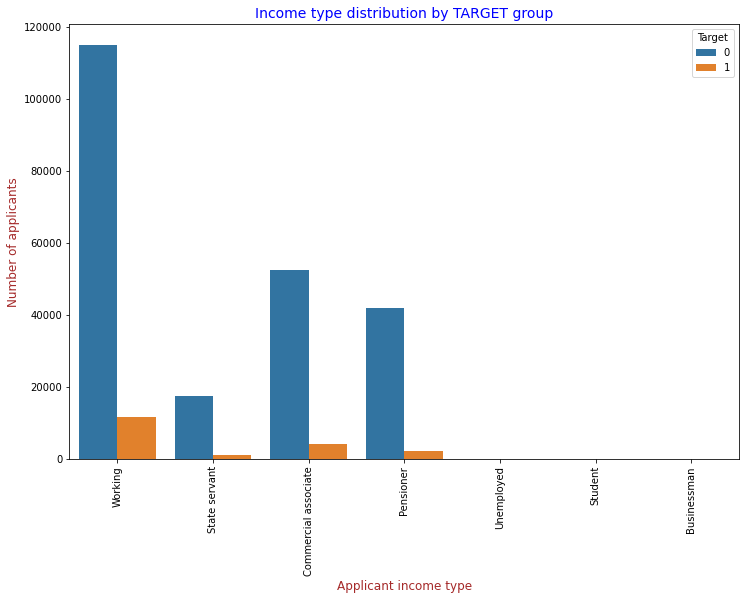

In [96]:
# Plot income type and payment possibility of all clients

fig = plt.figure(figsize = (12, 8))
sns.countplot(loan_data["NAME_INCOME_TYPE"], palette = "tab10", hue = loan_data["TARGET"])
plt.legend(title = 'Target', bbox_to_anchor = (1, 1), loc = 'upper right')
plt.ylabel('Number of applicants', color = 'Brown', fontsize = 12)
plt.xlabel('Applicant income type', color = 'Brown', fontsize = 12)
plt.title('Income type distribution by TARGET group', fontsize = 14, color = 'Blue')
plt.xticks(rotation = 90)
plt.show()

#### <font color = Blue> Observations: 
<font color = Blue>1. Working group has highest number of target_0 people, i.e., people with high probability of repayment.<br>
<font color = Blue>2. Student, Unemployed, and Businessman represent a very small percentage of loan applicant.<br>
<font color = Blue>3. 'State servant' has lowest number of defaulters amongst the four prime groups of loan applicants.<br>
<font color = Blue>4. For 'Pensioner', the ratio of repayer to defaulter looks very small.

### <font color = Green> Education type and payment possibility

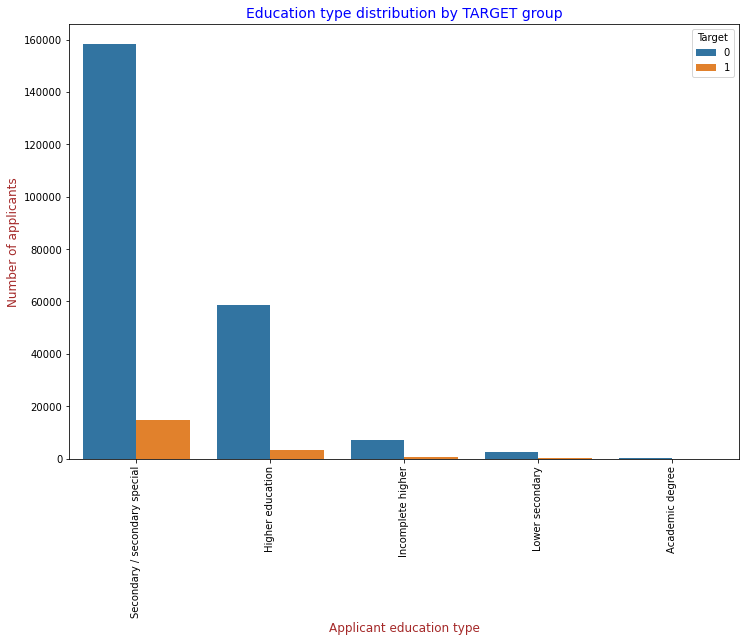

In [97]:
# Plot number of children and family member by TARGET to reveal any relationship

fig = plt.figure(figsize = (12, 8))
sns.countplot(loan_data["NAME_EDUCATION_TYPE"], palette = "tab10", hue = loan_data["TARGET"])
plt.legend(title = 'Target', bbox_to_anchor = (1, 1), loc = 'upper right')
plt.ylabel('Number of applicants', color = 'Brown', fontsize = 12)
plt.xlabel('Applicant education type', color = 'Brown', fontsize = 12)
plt.title('Education type distribution by TARGET group', fontsize = 14, color = 'Blue')
plt.xticks(rotation = 90)
plt.show()

#### <font color = Blue> Observations: 
> <font color = Blue> 1. 'Secondary/secondary special' group has highest number of probable repayers followed by 'Higher education' group.<br>
    2. Number of applicants in 'Academic degree' group is very low.

### <font color = Green> What type of family status has lowest number of defaulters?

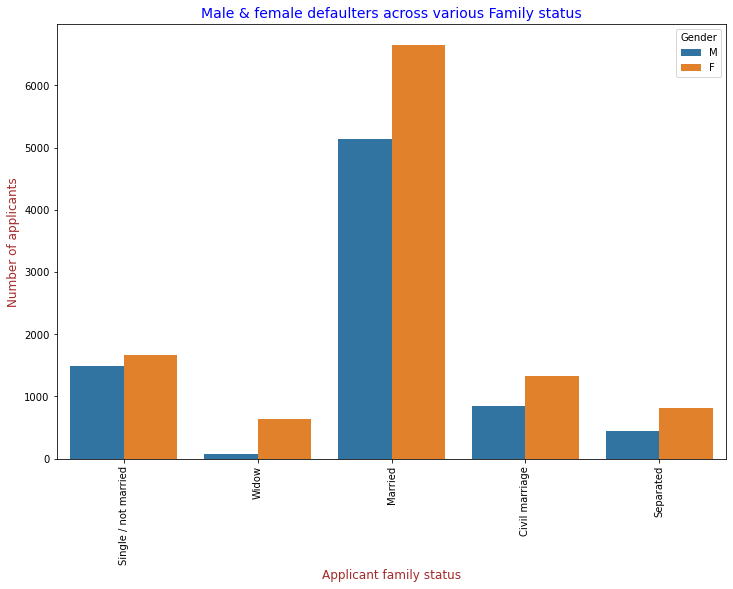

In [98]:
# Plot family status and target_0

fig = plt.figure(figsize = (12, 8))
sns.countplot(target_1["NAME_FAMILY_STATUS"], palette = "tab10", hue = target_1["CODE_GENDER"])
plt.legend(title = 'Gender', bbox_to_anchor = (1, 1), loc = 'upper right')
plt.ylabel('Number of applicants', color = 'Brown', fontsize = 12)
plt.xlabel('Applicant family status', color = 'Brown', fontsize = 12)
plt.title('Male & female defaulters across various Family status', fontsize = 14, color = 'Blue')
plt.xticks(rotation = 90)
plt.show()

#### <font color = Blue> Observations: 
> <font color = Blue> 1. 'Married' group has the highest number of defaulters.<br>
    2. Female and married applicants constitute the highest number of defaulters.<br>
    3. 'Single/not married' group seems to have smallest Female-to-Male defaulter ratio.

### <font color = Green> Ocupation type and payment possibility

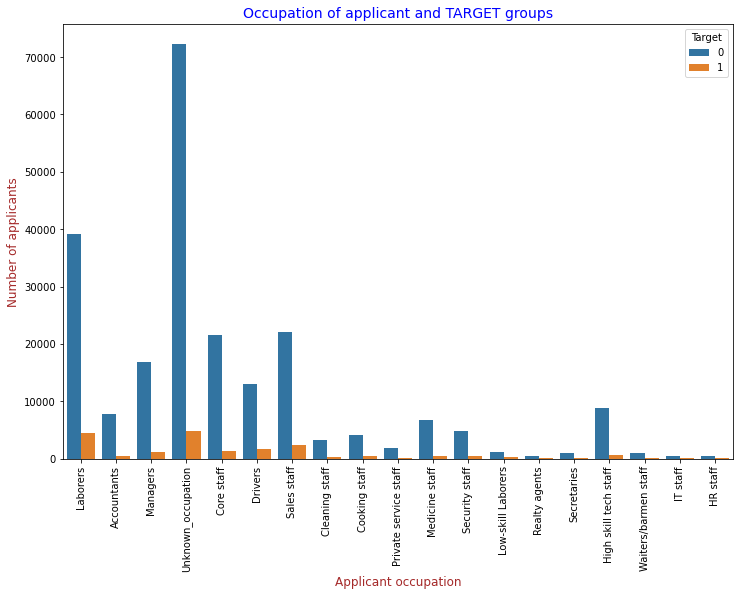

In [99]:
# Plot relationship between occupation type and TARGET variable 

fig = plt.figure(figsize = (12, 8))
sns.countplot(loan_data["OCCUPATION_TYPE"], palette = "tab10", hue = loan_data["TARGET"])
plt.legend(title = 'Target', bbox_to_anchor = (1, 1), loc = 'upper right')
plt.ylabel('Number of applicants', color = 'Brown', fontsize = 12)
plt.xlabel('Applicant occupation', color = 'Brown', fontsize = 12)
plt.title('Occupation of applicant and TARGET groups', fontsize = 14, color = 'Blue')
plt.xticks(rotation = 90)
plt.show()

#### <font color = Blue> Observations from plot: 
> <font color = Blue> 1. 'Unknown_occupation' column has the highest number of repayers and probably very low defaulter to repayer ratio. Therefore, if the occupation type is not revealed or found in the application, the company should dig deeper. A huge number of probable repayer belongs to this group and the company can expect great business gain from this group.<br>
> <font color = Blue>2. '‘Medicine staff' and 'High skill tech staff' have very high of repayer to defaulter. The company should prioritize these two groups during evaluation.<br>
> <font color = Blue>3. 'Laborers’ has a high number of defaulters.

### <font color = Green> Is there a preference of contract type by applicants who are likely to default?

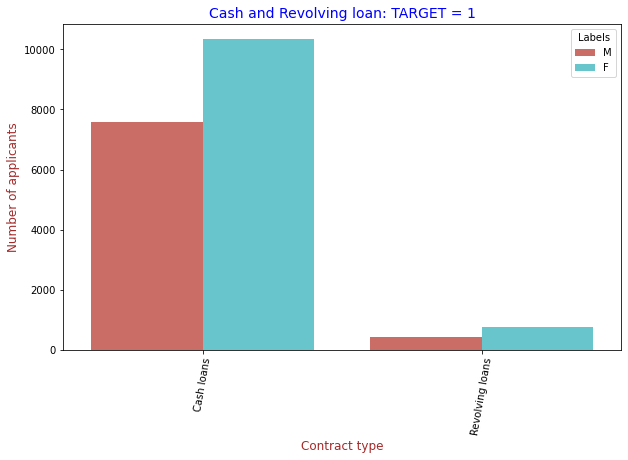

In [100]:
# Plot contract type by gender for TARGET = 1

plt.figure(figsize = (10, 6))
sns.countplot(data = target_1, x = 'NAME_CONTRACT_TYPE', order = target_1.NAME_CONTRACT_TYPE.value_counts().index, hue = 'CODE_GENDER', palette='hls') 
plt.legend(title = 'Labels', bbox_to_anchor = (1, 1), loc = 'upper right')
plt.xticks(rotation = 80)
plt.ylabel('Number of applicants', color = 'Brown', fontsize = 12)
plt.xlabel('Contract type', color = 'Brown', fontsize = 12)
plt.title('Cash and Revolving loan: TARGET = 1', fontsize = 14, color = 'Blue')
plt.show()

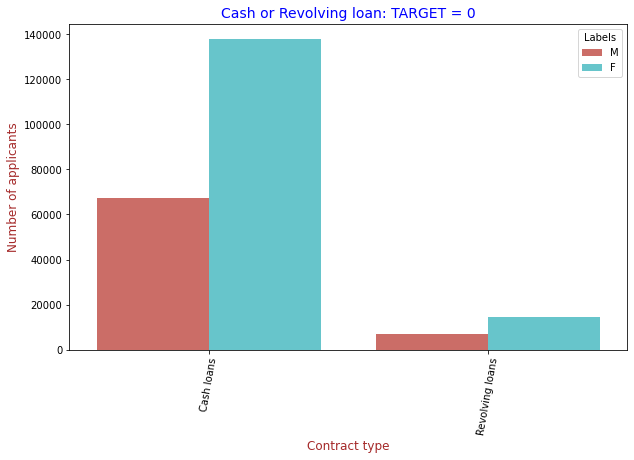

In [101]:
# Plot contract type by gender for TARGET = 0

plt.figure(figsize = (10, 6))
sns.countplot(data = target_0, x = 'NAME_CONTRACT_TYPE', order = target_0.NAME_CONTRACT_TYPE.value_counts().index, hue = 'CODE_GENDER', palette='hls') 
plt.legend(title = 'Labels', bbox_to_anchor = (1, 1), loc = 'upper right')
plt.xticks(rotation = 80)
plt.ylabel('Number of applicants', color = 'Brown', fontsize = 12)
plt.xlabel('Contract type', color = 'Brown', fontsize = 12)
plt.title('Cash or Revolving loan: TARGET = 0', fontsize = 14, color = 'Blue')
plt.show()

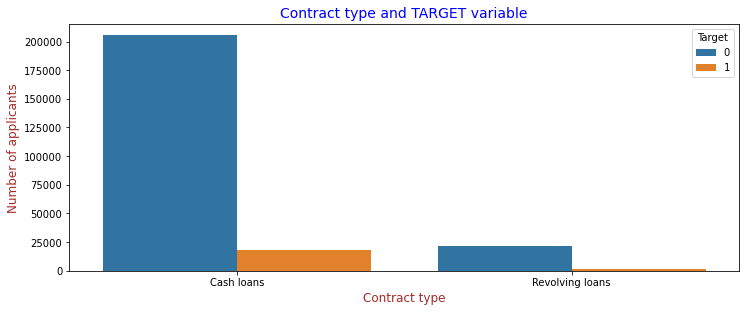

In [102]:
# Plot contract type and Target group

fig = plt.figure(figsize=(12,10))
plt.subplot(211)
sns.countplot(loan_data["NAME_CONTRACT_TYPE"], palette = "tab10", hue = loan_data["TARGET"])
plt.legend(title = 'Target', bbox_to_anchor = (1, 1), loc = 'upper right')
plt.title("Contract type and TARGET groups")
plt.ylabel('Number of applicants', color = 'Brown', fontsize = 12)
plt.xlabel('Contract type', color = 'Brown', fontsize = 12)
plt.title('Contract type and TARGET variable', fontsize = 14, color = 'Blue')
plt.show()

#### <font color = Blue> Observations from plot: 
> <font color = Blue> 1. Number of female applicants is higher than the number of male applicants in both cash and revolving loan me ranges for both the TARGET groups.<br>
    2. Majority of applicants who are probable repayers (target_0) prefers cash loan over revolving loans.

### <font color = Green> 'TARGET' variable and number of children and family members: Are these related?

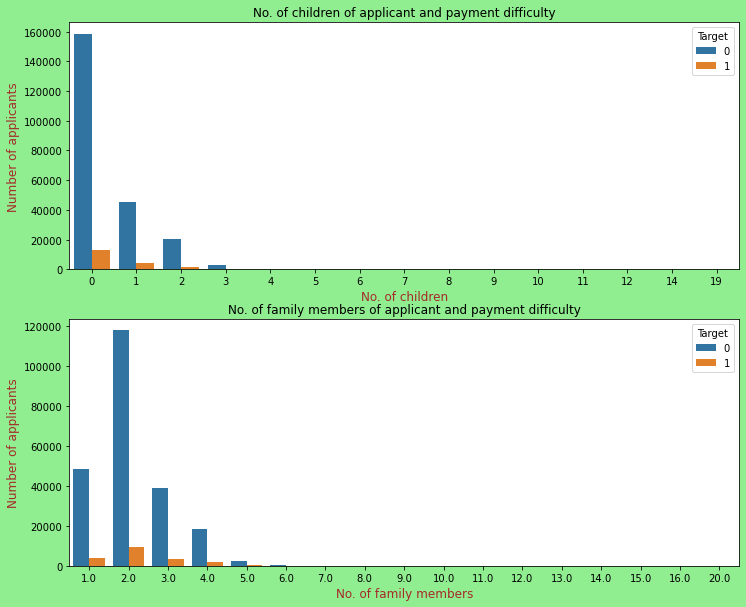

In [103]:
# Plot number of children and family member by TARGET to reveal any relationship

fig = plt.figure(figsize=(12,10))
plt.subplot(211)
sns.countplot(loan_data["CNT_CHILDREN"], palette = "tab10", hue = loan_data["TARGET"])
plt.legend(title = 'Target', bbox_to_anchor = (1, 1), loc = 'upper right')
plt.ylabel('Number of applicants', color = 'Brown', fontsize = 12)
plt.xlabel('No. of children', color = 'Brown', fontsize = 12)
plt.title("No. of children of applicant and payment difficulty")

plt.subplot(212)
sns.countplot(loan_data["CNT_FAM_MEMBERS"], palette = "tab10", hue = loan_data["TARGET"])
plt.legend(title = 'Target', bbox_to_anchor = (1, 1), loc = 'upper right')
plt.ylabel('Number of applicants', color = 'Brown', fontsize = 12)
plt.xlabel('No. of family members', color = 'Brown', fontsize = 12)
plt.title('No. of family members of applicant and payment difficulty')
fig.set_facecolor("lightgreen")

#### <font color = Blue> The above plots are not highly intuitive becasue we have used absolute numbers instead of ratios of repayers and defaulters. Let us check the ratios and see if we get any additional insights, as follows:

In [104]:
# Check the ratio of repayer to defaulter for different number of children 

ratio_0 = (target_0[target_0["CNT_CHILDREN"] == 0].value_counts().sum()) / target_1[target_1["CNT_CHILDREN"] == 0].value_counts().sum()
print('ratio_0:', round(ratio_0, 2))
ratio_1 = (target_0[target_0["CNT_CHILDREN"] == 1].value_counts().sum()) / target_1[target_1["CNT_CHILDREN"] == 1].value_counts().sum()
print('ratio_1:', round(ratio_1, 2))
ratio_2 = (target_0[target_0["CNT_CHILDREN"] == 2].value_counts().sum()) / target_1[target_1["CNT_CHILDREN"] == 2].value_counts().sum()
print('ratio_2:', round(ratio_2, 2))
ratio_3 = (target_0[target_0["CNT_CHILDREN"] == 3].value_counts().sum()) / target_1[target_1["CNT_CHILDREN"] == 3].value_counts().sum()
print('ratio_3:', round(ratio_3, 2))

ratio_0: 12.51
ratio_1: 10.59
ratio_2: 11.02
ratio_3: 9.28


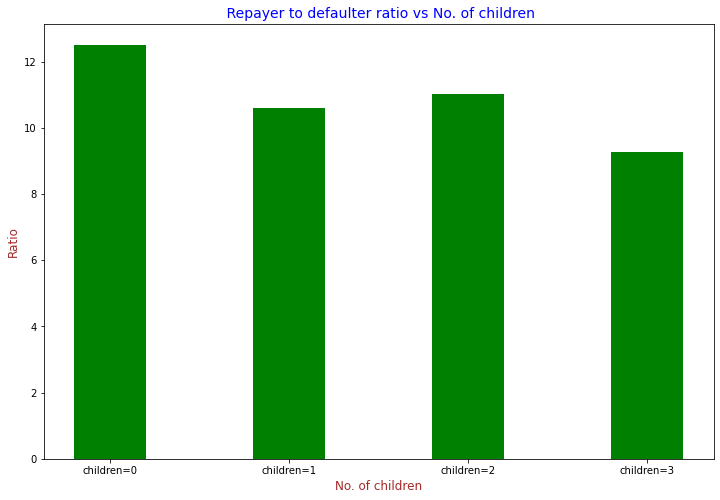

In [105]:
# Plot the four ratios  

fig = plt.figure(figsize=(12, 8))
repayer_to_defaulter = [ratio_0, ratio_1, ratio_2, ratio_3]
children_counts = ['children=0', 'children=1', 'children=2', 'children=3']
plt.ylabel('Ratio', color = 'Brown', fontsize = 12)
plt.xlabel('No. of children', color = 'Brown', fontsize = 12)
plt.title(" Repayer to defaulter ratio vs No. of children", color = 'Blue', fontsize = 14)
plt.bar(children_counts, repayer_to_defaulter, color = 'Green', width = 0.4)
plt.show()

#### <font color = Blue> Observations from ALL the above plots: 
> <font color = Blue> 1. Applicants with no children represent the highest number of repayers. So these applicants are less risky for the bank. The ratio plot confirms the same.<br>
2. Applicants with 3 children have the lowest ratio, which infers that they are highly likely to default. The bank needs to ask: 'Does more children make clients more risky?' <br> 
3. Applicants with two family members represent the highest number of repayers as compared to applicants with 1, 3, 4 or 5 family members (inference from all three plots above). <br>
4. Applicants with 1 children riskier than the applicants with no or 2 children.

### <font color = Green> Analysis of outliers

In [106]:
# Print data

loan_data.head(3)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_RANGE,AMT_CREDIT_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,Laborers,1.0,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0,200000-225000,400000-450000
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,Laborers,1.0,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0,50000-75000,0-150000
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,16941,1588,4970.0,477,Laborers,2.0,WEDNESDAY,16,0,0,0,0,0,0,Other,0.354225,0.621226,0.0,0.0,0.0,0.0,2536.0,0.0,0.0,0.0,0.0,1.0,1.0,"75000,100000",450000-500000


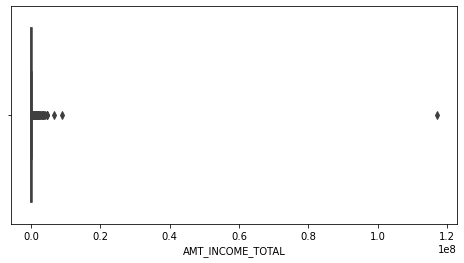

In [107]:
# Outliers in 'AMT_INCOME_TOTAL'

fig = plt.figure(figsize = (8, 4))
sns.boxplot(data = loan_data, x = 'AMT_INCOME_TOTAL', orient = 'v')
plt.show()

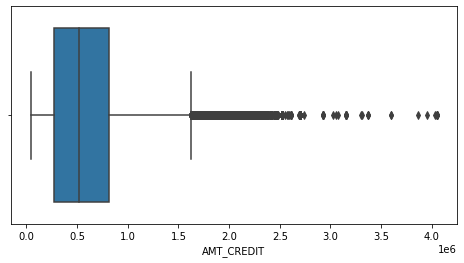

In [108]:
# Outliers in 'AMT_CREDIT'

fig = plt.figure(figsize = (8, 4))
sns.boxplot(data = loan_data, x = 'AMT_CREDIT', orient = 'v')
plt.show()

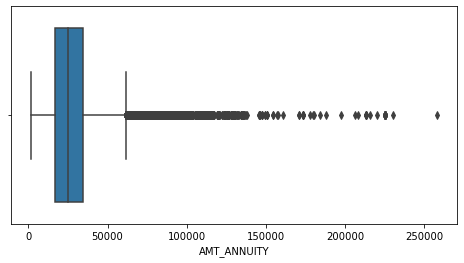

In [109]:
# Outliers in 'AMT_ANNUITY'

fig = plt.figure(figsize = (8, 4))
sns.boxplot(data = loan_data, x = 'AMT_ANNUITY', orient = 'v')
plt.show()

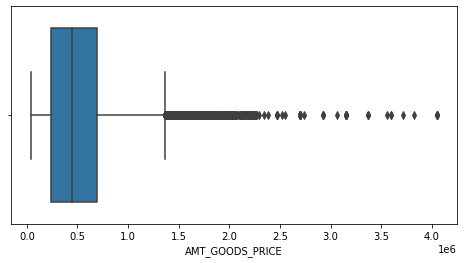

In [110]:
# Outliers in 'AMT_GOODS_PRICE'

fig = plt.figure(figsize = (8, 4))
sns.boxplot(data = loan_data, x = 'AMT_GOODS_PRICE', orient = 'v')
plt.show()

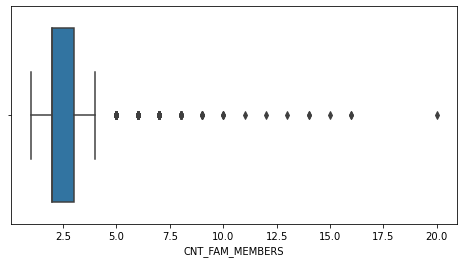

In [111]:
# Outliers in 'CNT_FAM_MEMBERS'

fig = plt.figure(figsize = (8, 4))
sns.boxplot(data = loan_data, x = 'CNT_FAM_MEMBERS', orient = 'v')
plt.show()

#### <font color = Blue> Observations:
<font color = Blue>1. All these numeric variables: 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', and 'CNT_FAM_MEMBERS' have outliers as shown in the above plots.<br>
<font color = Blue>2. Therefore, the bank should be very careful while evaluating applicant profiles using central tendency measures, especially mean, which is highly biased to outliers.

### Outlier Treatment

In [112]:
loan_data.shape

(245891, 47)

###### AMT_INCOME_TOTAL

In [113]:
loan_data.AMT_INCOME_TOTAL.quantile([0.75,0.8,0.9,0.95,0.98,0.99,1])

0.75       202500.0
0.80       225000.0
0.90       270000.0
0.95       337500.0
0.98       427500.0
0.99       495000.0
1.00    117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [114]:
loan_data=loan_data[(loan_data.AMT_INCOME_TOTAL<=427500)]

In [115]:
loan_data.shape

(241031, 47)

##### AMT_CREDIT

In [116]:
loan_data.AMT_CREDIT.quantile([0.75,0.8,0.9,0.95,0.98,0.99,1])

0.75     808650.0
0.80     900000.0
0.90    1129500.0
0.95    1350000.0
0.98    1597500.0
0.99    1800000.0
1.00    3860019.0
Name: AMT_CREDIT, dtype: float64

In [117]:
loan_data=loan_data[(loan_data.AMT_CREDIT<=1597500)]

In [118]:
loan_data.shape

(236211, 47)

##### AMT_ANNUITY

In [119]:
loan_data.AMT_ANNUITY.quantile([0.75,0.8,0.9,0.95,0.98,0.99,1])

0.75     33268.5
0.80     36184.5
0.90     43051.5
0.95     49900.5
0.98     57001.5
0.99     63549.0
1.00    146250.0
Name: AMT_ANNUITY, dtype: float64

In [120]:
loan_data=loan_data[(loan_data.AMT_ANNUITY<=57000)]

In [121]:
loan_data.shape

(231451, 47)

##### AMT_GOODS_PRICE

In [122]:
loan_data.AMT_GOODS_PRICE.quantile([0.75,0.8,0.9,0.95,0.98,0.99,1])

0.75     675000.0
0.80     720000.0
0.90     922500.0
0.95    1125000.0
0.98    1350000.0
0.99    1350000.0
1.00    1597500.0
Name: AMT_GOODS_PRICE, dtype: float64

In [123]:
loan_data=loan_data[(loan_data.AMT_GOODS_PRICE<=1350000.0)]

In [124]:
loan_data.shape

(229351, 47)

##### CNT_FAM_MEMBERS

In [125]:
loan_data.CNT_FAM_MEMBERS.quantile([0.75,0.8,0.9,0.95,0.98,0.99,1])

0.75     3.0
0.80     3.0
0.90     3.0
0.95     4.0
0.98     4.0
0.99     5.0
1.00    20.0
Name: CNT_FAM_MEMBERS, dtype: float64

In [126]:
loan_data=loan_data[(loan_data.CNT_FAM_MEMBERS<=3)]

In [127]:
loan_data.shape

(207589, 47)

### <font color = Green> Correlation analysis
    
### loan_data

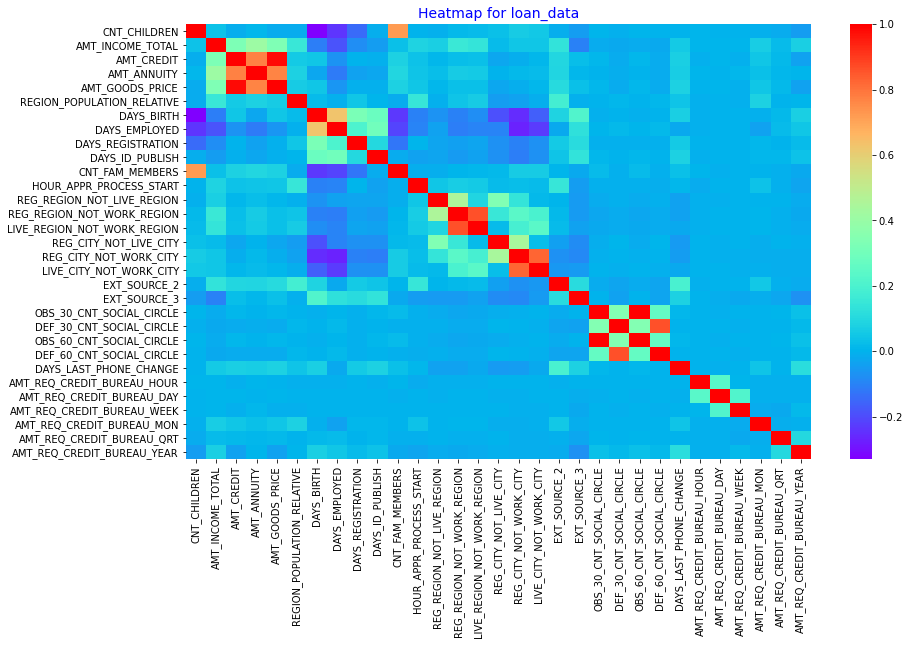

In [128]:
# Create the correlation matrix and plot a heatmap

loan_data_corr = loan_data.iloc[0:,2:].corr()
  
f, ax = plt.subplots(figsize =(14, 8)) 
sns.heatmap(loan_data_corr, ax = ax, cmap ="rainbow")
plt.title('Heatmap for loan_data', color = 'Blue', fontsize = 14)
plt.show()

In [129]:
# Print the correlation matrix

loan_data_corr

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
CNT_CHILDREN,1.000000,0.035927,-0.011011,0.012517,-0.015992,-0.016630,-0.329082,-0.239835,-0.143598,-0.007379,0.722170,0.001615,-0.006039,0.015612,0.020014,0.031947,0.062209,0.051179,-0.012276,-0.043897,0.006769,-0.003882,0.006459,-0.001815,0.000157,0.003727,-0.001259,-0.001850,-0.004623,-0.012933,-0.048502
AMT_INCOME_TOTAL,0.035927,1.000000,0.329533,0.412591,0.331677,0.152995,-0.105906,-0.186013,-0.079259,-0.045152,0.030097,0.083643,0.072421,0.154104,0.143122,0.021781,0.045175,0.045129,0.138099,-0.100834,-0.014655,-0.021645,-0.014528,-0.022709,0.057202,0.004478,0.004394,0.006980,0.066024,0.022677,0.073371
AMT_CREDIT,-0.011011,0.329533,1.000000,0.771760,0.982820,0.058526,0.048798,-0.066205,-0.001192,-0.006392,0.078047,0.039054,0.010161,0.028465,0.031648,-0.025768,-0.008536,0.010213,0.095364,0.026518,0.009808,-0.012454,0.009845,-0.015403,0.074236,-0.003011,0.004399,-0.003267,0.047082,0.015715,-0.033262
AMT_ANNUITY,0.012517,0.412591,0.771760,1.000000,0.770547,0.076095,-0.025828,-0.111942,-0.035572,-0.025151,0.094654,0.040374,0.029004,0.062292,0.060018,-0.001205,0.016320,0.023564,0.091050,0.009539,0.001747,-0.011000,0.002093,-0.013152,0.068214,0.006809,0.002583,0.012670,0.031464,0.008938,0.005986
AMT_GOODS_PRICE,-0.015992,0.331677,0.982820,0.770547,1.000000,0.063389,0.046720,-0.064008,-0.003533,-0.003936,0.077895,0.048827,0.012143,0.029399,0.031691,-0.026436,-0.009958,0.009082,0.104260,0.030303,0.010188,-0.013223,0.010210,-0.016022,0.078768,-0.001970,0.004954,-0.003092,0.049752,0.016016,-0.035368
REGION_POPULATION_RELATIVE,-0.016630,0.152995,0.058526,0.076095,0.063389,1.000000,0.022411,-0.006057,0.046739,0.005914,-0.016564,0.146735,-0.003565,0.040326,0.063947,-0.045556,-0.035748,-0.009518,0.179822,-0.004905,-0.000674,0.012399,-0.000285,0.009305,0.044705,-0.002079,0.001462,-0.003375,0.079937,-0.001407,0.005172
DAYS_BIRTH,-0.329082,-0.105906,0.048798,-0.025828,0.046720,0.022411,1.000000,0.628265,0.320426,0.282196,-0.232086,-0.102050,-0.068933,-0.102127,-0.075300,-0.190451,-0.253426,-0.165271,0.085312,0.215964,-0.003409,0.002284,-0.003068,0.000736,0.075791,-0.007130,-0.001679,-0.000270,-0.004804,0.015494,0.072060
DAYS_EMPLOYED,-0.239835,-0.186013,-0.066205,-0.111942,-0.064008,-0.006057,0.628265,1.000000,0.201508,0.296281,-0.209714,-0.098052,-0.037919,-0.110589,-0.098320,-0.097146,-0.269520,-0.230007,-0.018022,0.123899,0.007543,0.017226,0.007598,0.014575,-0.022636,-0.006390,0.000795,0.001514,-0.036420,0.021253,0.047522
DAYS_REGISTRATION,-0.143598,-0.079259,-0.001192,-0.035572,-0.003533,0.046739,0.320426,0.201508,1.000000,0.101027,-0.123083,0.005278,-0.029741,-0.038462,-0.028691,-0.071615,-0.100753,-0.070709,0.056317,0.111274,-0.006839,-0.003250,-0.006919,-0.005337,0.055176,0.002754,0.000890,-0.000134,0.010939,0.002292,0.021856
DAYS_ID_PUBLISH,-0.007379,-0.045152,-0.006392,-0.025151,-0.003936,0.005914,0.282196,0.296281,0.101027,1.000000,-0.017207,-0.035879,-0.029797,-0.049839,-0.037934,-0.072464,-0.106371,-0.070459,0.041994,0.136555,0.010115,-0.000093,0.010487,-0.001698,0.079228,-0.005094,0.001381,-0.000787,0.010286,0.009132,0.037946


#### <font color = Blue> Observations: 
> <font color = Blue> 1. 'AMT_GOODS_PRICE' and 'AMT_CREDIT', as expected have high positive correlation. Loan is requested to buy a product and if the product is expensive amount of loan requested is also high.<br>
2. 'EXT_SOURCE_2' and 'EXT_SOURCE_3' are negatively correlated with 'REG_CITY_NOT_WORK_CITY' (correlation: -0.071229 and -0.079600). This implies that for applicants with permanent address different from work address, the scores from external sources are less.<br>
3. Annuity amount and income amount have high positive correlation. This makes perfect sense: high income clients can choose to pay higher annuity<br>
4. 'AMT_ANNUITY' and 'AMT_CREDIT' have high positive correlation. This is logical: more the credit amount, more the repayment amount.<br>
5. 'DAYS_EMPLOYED' and 'AMT_ANNUITY' are negatively correlated. Longer the employment period, less is the annuity.<br>
6. External source scores of an have negative correlation with 'TARGET' (Correlation: -0.154078 and -0.179110). If target is 1, applicants are likely to default and the score goes down, and vice-versa. This makes perfect business sense.<br>
7. 'TARGET' is negatively correlated with 'DAYS_BIRTH'. The younger clients have payment difficulties.<br>
8. 'DAYS_ID_PUBLISH' is negatively related to 'TARGET'. 'DAYS_ID_PUBLISH' variable represents how many days before the application did client change the identity document with which loan was applied for. If 'DAYS_ID_PUBLISH' is less for a client, he has high default probability.

### <font color = Green> Correlation analysis: target_1 (Clients with payment difficulties)

In [130]:
# Create the correlation matrix for target_1: applicants with payment difficulties

target1_corr = target_1.iloc[0:,2:].corr() 
target1_corr

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
CNT_CHILDREN,1.000000,0.005144,0.000760,0.037685,-0.005293,-0.030817,-0.272562,-0.196652,-0.153369,0.038658,0.889381,-0.021174,-0.018831,-0.017377,-0.011843,0.006667,0.050758,0.054975,-0.011027,-0.020543,0.027193,0.008942,0.026389,0.003403,-0.013964,0.000338,-0.013536,-0.013691,-0.012530,-0.022000,-0.035387
AMT_INCOME_TOTAL,0.005144,1.000000,0.034013,0.041567,0.033482,0.007009,-0.004139,-0.014011,0.000785,0.003681,0.006460,0.012747,0.006765,0.012480,0.011417,-0.002699,-0.003943,-0.002182,0.003266,-0.015102,-0.006045,-0.005540,-0.005981,-0.005161,-0.000684,0.000281,-0.000345,-0.000098,0.003662,-0.001553,0.001113
AMT_CREDIT,0.000760,0.034013,1.000000,0.752534,0.982773,0.075378,0.122201,-0.010904,0.016939,0.046615,0.048975,0.038734,0.024323,0.030765,0.028662,-0.032372,-0.036772,-0.015335,0.115371,0.078149,0.016097,-0.026499,0.016492,-0.031076,0.102169,-0.009666,0.003410,0.007487,0.057476,-0.020367,-0.038055
AMT_ANNUITY,0.037685,0.041567,0.752534,1.000000,0.753557,0.076013,0.010836,-0.087268,-0.041616,0.019882,0.082620,0.034793,0.040006,0.065893,0.059746,-0.008494,0.001751,0.010959,0.110266,0.042094,0.003958,-0.019114,0.004896,-0.025866,0.077139,0.010202,0.000430,0.031894,0.053029,-0.013984,-0.016333
AMT_GOODS_PRICE,-0.005293,0.033482,0.982773,0.753557,1.000000,0.082206,0.121686,-0.006779,0.016498,0.050899,0.045831,0.049577,0.027335,0.034532,0.031318,-0.032201,-0.037164,-0.015394,0.124992,0.079160,0.014627,-0.022634,0.015114,-0.027140,0.108152,-0.008012,0.004992,0.008244,0.061053,-0.019270,-0.040234
REGION_POPULATION_RELATIVE,-0.030817,0.007009,0.075378,0.076013,0.082206,1.000000,0.047480,0.008423,0.057248,0.011961,-0.027522,0.129024,-0.023745,0.019653,0.044336,-0.058015,-0.050594,-0.022157,0.171390,-0.009487,0.006287,0.024068,0.006759,0.018817,0.056143,0.001078,-0.005034,0.005518,0.072191,-0.004836,-0.002555
DAYS_BIRTH,-0.272562,-0.004139,0.122201,0.010836,0.121686,0.047480,1.000000,0.583533,0.284880,0.229351,-0.224922,-0.065238,-0.047641,-0.067097,-0.046401,-0.161345,-0.217470,-0.126365,0.100711,0.171636,0.001493,-0.005176,0.001510,-0.002706,0.105299,-0.016393,0.007489,0.007918,0.007292,0.020898,0.084410
DAYS_EMPLOYED,-0.196652,-0.014011,-0.010904,-0.087268,-0.006779,0.008423,0.583533,1.000000,0.191519,0.221016,-0.191636,-0.067017,-0.034795,-0.089541,-0.077627,-0.083656,-0.241270,-0.195826,-0.005428,0.095842,-0.007647,0.008816,-0.007757,0.012208,-0.001321,-0.008698,0.023097,0.016827,-0.025587,0.019056,0.034112
DAYS_REGISTRATION,-0.153369,0.000785,0.016939,-0.041616,0.016498,0.057248,0.284880,0.191519,1.000000,0.087615,-0.152237,0.030855,-0.014190,-0.016392,-0.013324,-0.039422,-0.085374,-0.064633,0.069246,0.085676,-0.015193,-0.012952,-0.015784,-0.010947,0.071579,0.004670,0.008145,-0.003196,-0.003157,0.014517,0.014855
DAYS_ID_PUBLISH,0.038658,0.003681,0.046615,0.019882,0.050899,0.011961,0.229351,0.221016,0.087615,1.000000,0.033520,-0.020663,-0.026052,-0.028532,-0.018617,-0.064957,-0.068442,-0.030036,0.058211,0.127782,0.022587,-0.004537,0.022130,0.000275,0.112605,-0.004272,0.011577,-0.003355,0.018407,-0.007608,0.040157


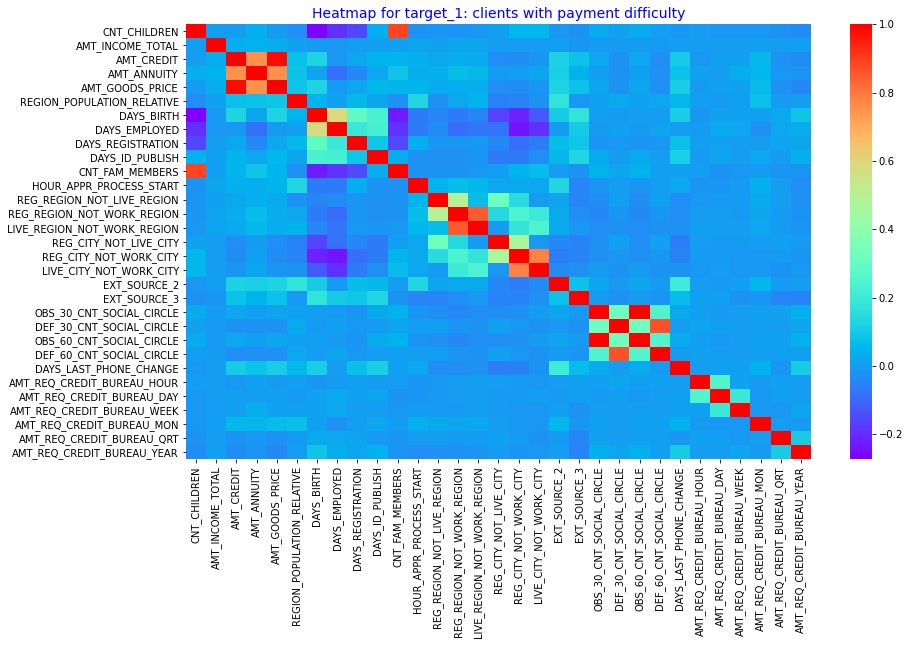

In [131]:
# Plot heatmap for target_1

f, ax = plt.subplots(figsize =(14, 8)) 
sns.heatmap(target1_corr, ax = ax, cmap ="rainbow") 
plt.title('Heatmap for target_1: clients with payment difficulty', color = 'Blue', fontsize = 14)
plt.show()

### <font color = Green> Correlation analysis: target_0 (Clients with NO payment difficulties)

In [132]:
# Create the correlation matrix for target_0: applicants with payment difficulties

target0_corr = target_0.iloc[0:,2:].corr() 
target0_corr

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
CNT_CHILDREN,1.000000,0.028458,0.002458,0.022266,-0.000920,-0.021588,-0.352408,-0.248433,-0.188080,0.032434,0.880707,-0.004448,-0.011186,0.011315,0.017003,0.023673,0.073657,0.071089,-0.014488,-0.041411,0.015202,-0.002852,0.014942,-0.002716,0.006778,0.000154,-0.000378,-0.001568,-0.011243,-0.010357,-0.043278
AMT_INCOME_TOTAL,0.028458,1.000000,0.362358,0.443201,0.368595,0.178592,-0.075022,-0.151256,-0.070777,-0.033416,0.032334,0.077044,0.074311,0.148997,0.137999,0.016278,0.023259,0.024667,0.143087,-0.072276,-0.028851,-0.028237,-0.028752,-0.027997,0.040763,0.001914,0.008493,0.006781,0.061809,0.013669,0.030465
AMT_CREDIT,0.002458,0.362358,1.000000,0.774248,0.987126,0.099113,0.037211,-0.074696,-0.013753,-0.005960,0.062355,0.052501,0.024584,0.053512,0.053670,-0.022625,-0.011897,0.005109,0.123810,0.036103,-0.001055,-0.019321,-0.001034,-0.021817,0.063930,-0.003566,0.005580,-0.001783,0.055432,0.020958,-0.049107
AMT_ANNUITY,0.022266,0.443201,0.774248,1.000000,0.778940,0.120501,-0.020175,-0.107720,-0.039467,-0.018874,0.077064,0.052795,0.041692,0.080380,0.075122,-0.004219,0.003573,0.011830,0.121911,0.028128,-0.012447,-0.021291,-0.012251,-0.022576,0.060725,0.004084,0.003743,0.012615,0.038698,0.014345,-0.010429
AMT_GOODS_PRICE,-0.000920,0.368595,0.987126,0.778940,1.000000,0.102192,0.034390,-0.073319,-0.016474,-0.003855,0.060937,0.061016,0.026535,0.054716,0.053951,-0.022471,-0.012802,0.004011,0.130186,0.038989,-0.001228,-0.020613,-0.001236,-0.022893,0.066218,-0.002816,0.005942,-0.001419,0.057358,0.021127,-0.051214
REGION_POPULATION_RELATIVE,-0.021588,0.178592,0.099113,0.120501,0.102192,1.000000,0.020743,-0.010402,0.048711,0.000216,-0.021327,0.162890,0.004801,0.058817,0.082326,-0.045007,-0.036659,-0.009895,0.192625,-0.012433,-0.009572,0.007061,-0.009157,0.003386,0.041500,-0.001651,0.000984,-0.003401,0.082320,-0.001722,0.001843
DAYS_BIRTH,-0.352408,-0.075022,0.037211,-0.020175,0.034390,0.020743,1.000000,0.625145,0.333225,0.242856,-0.305689,-0.094733,-0.062637,-0.095458,-0.071058,-0.176145,-0.237587,-0.158827,0.070768,0.197140,-0.008386,0.003285,-0.008028,0.001717,0.067011,-0.005040,-0.001575,-0.000536,-0.002409,0.015495,0.072838
DAYS_EMPLOYED,-0.248433,-0.151256,-0.074696,-0.107720,-0.073319,-0.010402,0.625145,1.000000,0.208756,0.265890,-0.242380,-0.092831,-0.035264,-0.108572,-0.097307,-0.088863,-0.253968,-0.219143,-0.030266,0.111775,0.007593,0.019647,0.007693,0.016505,-0.025737,-0.005304,-0.000286,0.001239,-0.035730,0.021194,0.053449
DAYS_REGISTRATION,-0.188080,-0.070777,-0.013753,-0.039467,-0.016474,0.048711,0.333225,0.208756,1.000000,0.086741,-0.178629,0.006286,-0.027114,-0.037579,-0.028877,-0.063072,-0.095957,-0.070387,0.049670,0.103451,-0.007766,-0.001553,-0.007728,-0.004052,0.051412,0.002063,-0.000253,0.000398,0.012946,0.001421,0.025679
DAYS_ID_PUBLISH,0.032434,-0.033416,-0.005960,-0.018874,-0.003855,0.000216,0.242856,0.265890,0.086741,1.000000,0.021650,-0.031970,-0.031011,-0.045980,-0.033375,-0.066985,-0.091335,-0.057977,0.034280,0.124630,0.011633,-0.000437,0.012062,-0.002195,0.072923,-0.004697,0.000673,0.000416,0.009030,0.009204,0.032924


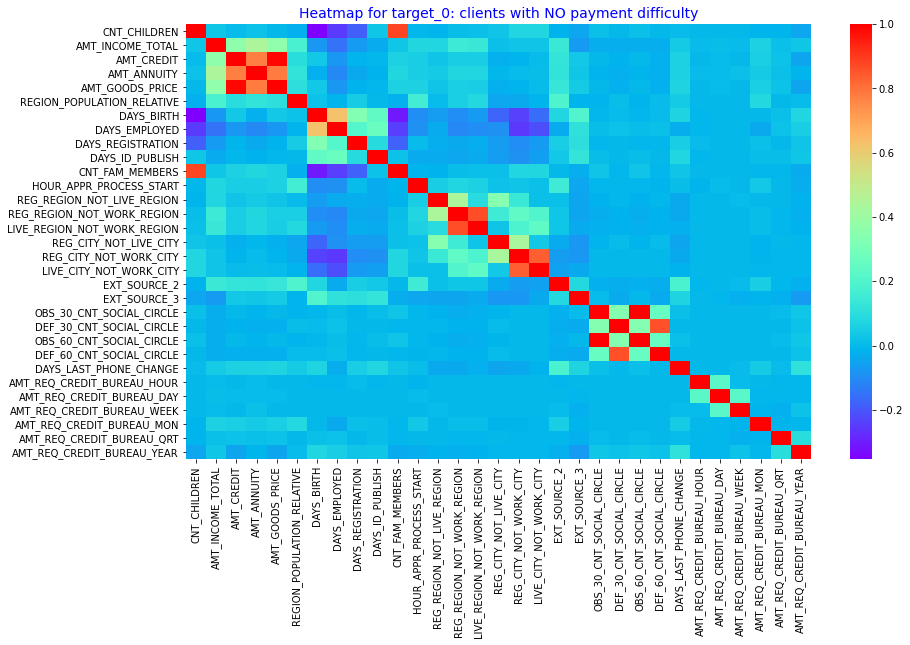

In [133]:
# Plot heatmap for target_0

f, ax = plt.subplots(figsize =(14, 8)) 
sns.heatmap(target0_corr, ax = ax, cmap ="rainbow") 
plt.title('Heatmap for target_0: clients with NO payment difficulty', color = 'Blue', fontsize = 14)
plt.show()

### <font color = Green> Top 10 correlation for target_1: clients with payment difficulty

In [134]:
# Correlation matrix
target1_corr = target_1.corr()

# Create an array matrix with upper diagonal elements (k = 1) with help of np.triu
corr_matrix = target1_corr.where(np.triu(np.ones(target1_corr.shape), k = 1).astype(np.bool))
corr_matrix = corr_matrix.unstack().reset_index()

# Set column name
corr_matrix.columns = ['Var1', 'Var2', 'Correlation']

# Drop na values
corr_matrix.dropna(subset = ['Correlation'], inplace = True)

# rounding and absolute values of correlation
corr_matrix['Correlation'] = round(corr_matrix['Correlation'], 2)
corr_matrix['Correlation'] = abs(corr_matrix['Correlation'])

print('Top 10 correlation for defaulters')

# Type the array
corr_matrix.sort_values(by = 'Correlation', ascending = False).head(10)

Top 10 correlation for defaulters


,Var1,Var2,Correlation
814,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,1.00
202,AMT_GOODS_PRICE,AMT_CREDIT,0.98
398,CNT_FAM_MEMBERS,CNT_CHILDREN,0.89
848,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.87
543,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.85
645,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.78
203,AMT_GOODS_PRICE,AMT_ANNUITY,0.75
169,AMT_ANNUITY,AMT_CREDIT,0.75
305,DAYS_EMPLOYED,DAYS_BIRTH,0.58
509,REG_REGION_NOT_WORK_REGION,REG_REGION_NOT_LIVE_REGION,0.50


### <font color = Green> Top 10 correlation for target_0: clients with NO payment difficulty

In [135]:
# Correlation matrix
target0_corr = target_0.corr()

# Create an array matrix with upper diagonal elements (k = 1) with help of np.triu
corr_matrix1 = target0_corr.where(np.triu(np.ones(target1_corr.shape), k = 1).astype(np.bool))
corr_matrix1 = corr_matrix1.unstack().reset_index()

# Set column name
corr_matrix1.columns = ['Var1', 'Var2', 'Correlation']

# Drop na values
corr_matrix1.dropna(subset = ['Correlation'], inplace = True)

# rounding and absolute values of correlation
corr_matrix1['Correlation'] = round(corr_matrix1['Correlation'], 2)
corr_matrix1['Correlation'] = abs(corr_matrix1['Correlation'])

print('Top 10 correlation for repayers')
# Type the array
corr_matrix1.sort_values(by = 'Correlation', ascending = False).head(10)

Top 10 correlation for repayers


,Var1,Var2,Correlation
814,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,1.00
202,AMT_GOODS_PRICE,AMT_CREDIT,0.99
398,CNT_FAM_MEMBERS,CNT_CHILDREN,0.88
543,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.87
848,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.86
645,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.84
203,AMT_GOODS_PRICE,AMT_ANNUITY,0.78
169,AMT_ANNUITY,AMT_CREDIT,0.77
305,DAYS_EMPLOYED,DAYS_BIRTH,0.63
509,REG_REGION_NOT_WORK_REGION,REG_REGION_NOT_LIVE_REGION,0.44


In [136]:
loan_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_RANGE,AMT_CREDIT_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,Laborers,1.0,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0,200000-225000,400000-450000
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,Laborers,1.0,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0,50000-75000,0-150000
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,16941,1588,4970.0,477,Laborers,2.0,WEDNESDAY,16,0,0,0,0,0,0,Other,0.354225,0.621226,0.0,0.0,0.0,0.0,2536.0,0.0,0.0,0.0,0.0,1.0,1.0,"75000,100000",450000-500000
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,913500.0,Children,Pensioner,Secondary / secondary special,Married,House / apartment,0.018634,20099,365243,7427.0,3514,Unknown_occupation,2.0,WEDNESDAY,14,0,0,0,0,0,0,Unknown Organization type,0.205747,0.751724,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,100000-125000,900000 and above
10,100014,0,Cash loans,F,N,Y,1,112500.0,652500.0,21177.0,652500.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.022800,10197,679,4427.0,738,Core staff,3.0,SATURDAY,15,0,0,0,0,0,0,Medicine,0.651862,0.363945,0.0,0.0,0.0,0.0,844.0,0.0,0.0,0.0,1.0,0.0,0.0,100000-125000,650000-700000


In [138]:
my_report = sweetviz.analyze([loan_data,"Loan Data Analysis"],target_feat='TARGET')
my_report.show_html('Report.html')

                                             |                                                | [  0%]   00:00…

Report Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [136]:
loan_data.to_csv("loan_data_eda.csv")

## End of analysis